In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import numpy as np


In [2]:
df = pd.read_excel("./dados/TFL Bus Safety.xlsx")

### Análise Exploratória

In [3]:
df.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


In [4]:
df.columns

Index(['Year', 'Date Of Incident', 'Route', 'Operator', 'Group Name',
       'Bus Garage', 'Borough', 'Injury Result Description',
       'Incident Event Type', 'Victim Category', 'Victims Sex', 'Victims Age'],
      dtype='object')

In [5]:
df.shape

(23158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [7]:
df.isna().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

In [8]:
df.duplicated().sum()

1694

Não iremos remover as duplicatas pois não sabemos se foi um erro ou a mesma situação se repetiu no mesmo dia

#### Exploração dos atributos

In [9]:
df.Year = pd.to_datetime(df.Year, format='%Y').dt.year

In [10]:
# Listando o total por categoria de cada variável categórica
for coluna in df.columns:
    print('Total de Registros Por Categoria da Variável', coluna, ':\n', df[coluna].value_counts(), "\n", sep="")

Total de Registros Por Categoria da VariávelYear:
2017    6573
2016    6093
2015    5715
2018    4777
Name: Year, dtype: int64

Total de Registros Por Categoria da VariávelDate Of Incident:
2017-07-01    650
2017-10-01    621
2016-11-01    612
2018-05-01    589
2017-11-01    584
2016-09-01    582
2017-03-01    579
2015-06-01    564
2017-04-01    563
2017-08-01    563
2015-07-01    558
2018-06-01    557
2018-07-01    553
2016-10-01    551
2017-09-01    549
2018-01-01    547
2018-03-01    535
2015-12-01    523
2017-06-01    516
2017-12-01    516
2016-08-01    513
2017-05-01    510
2018-04-01    507
2018-02-01    507
2016-07-01    507
2016-04-01    504
2015-11-01    495
2016-05-01    494
2018-08-01    491
2018-09-01    491
2017-02-01    487
2015-09-01    487
2016-02-01    484
2015-05-01    472
2016-12-01    471
2015-04-01    470
2015-10-01    470
2016-01-01    466
2016-06-01    460
2015-03-01    460
2016-03-01    449
2015-08-01    446
2017-01-01    435
2015-01-01    399
2015-02-01    371


In [11]:
#Ajustar os nomes das tabelas
df.columns = ['Year', 'Date_Incident', 'Route', 'Operator', 'Group_Name',
              'Bus_Garage', 'Borough', 'Injury_Result_Description',
              'Incident_Event_Type', 'Victim_Category', 'Victims_Sex', 'Victims_Age']


In [12]:
df.columns

Index(['Year', 'Date_Incident', 'Route', 'Operator', 'Group_Name',
       'Bus_Garage', 'Borough', 'Injury_Result_Description',
       'Incident_Event_Type', 'Victim_Category', 'Victims_Sex', 'Victims_Age'],
      dtype='object')

### Pergunta 1 - Qual a quantidade de incidentes por gênero?

In [13]:
df['Victims_Sex'].value_counts()

Female     11847
Male        7709
Unknown     3602
Name: Victims_Sex, dtype: int64

In [14]:
sqldf("SELECT Victims_Sex, count(*) as Total FROM df group by Victims_Sex")

,Victims_Sex,Total
0,Female,11847
1,Male,7709
2,Unknown,3602


In [15]:
df_incidentes_genero = df.groupby('Victims_Sex').agg(Total=('Victims_Sex', 'count')).reset_index()
df_incidentes_genero

,Victims_Sex,Total
0,Female,11847
1,Male,7709
2,Unknown,3602


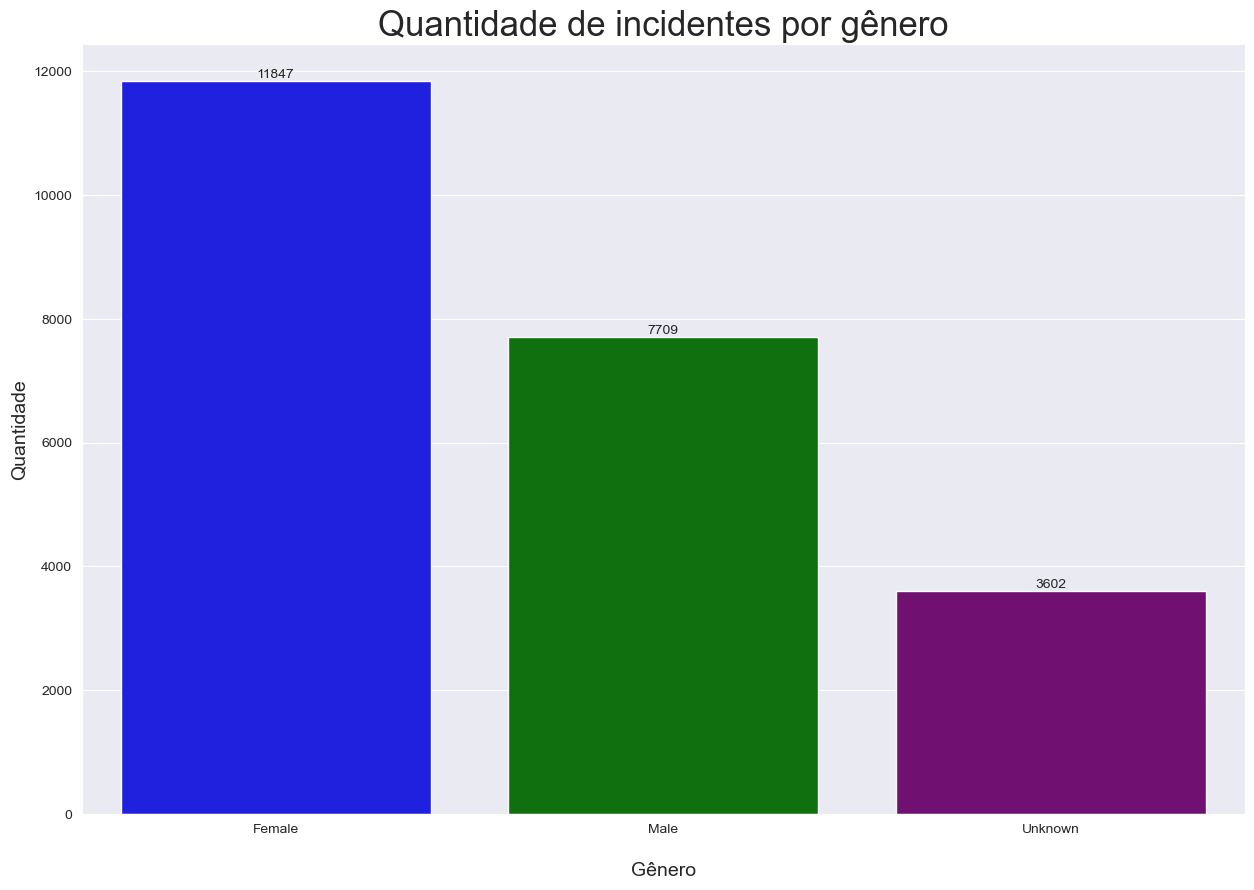

In [16]:
# Tamanho da figura
plt.figure(figsize=(15, 10))

# Chart
chart = sns.barplot(x='Victims_Sex',
                    y='Total',
                    data=df_incidentes_genero,
                    palette=["blue", "green", "purple"])
chart.set_title("Quantidade de incidentes por gênero", fontsize=25)
chart.bar_label(chart.containers[0])

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nGênero", fontsize=14)
chart.set_ylabel("Quantidade", fontsize=14);

### Pergunta 2 - Qual faixa etária esteve mais envolvida nos incidentes?

In [17]:
df['Victims_Age'].value_counts().head(1)

Adult    10754
Name: Victims_Age, dtype: int64

In [18]:
sqldf("SELECT Victims_Age, count(*) as Total FROM df GROUP BY Victims_Age ORDER BY Total DESC LIMIT 1")

,Victims_Age,Total
0,Adult,10754


In [19]:
df_faixa_etaria_incidente = df.groupby('Victims_Age').agg(Total=('Victims_Age', 'count')).reset_index()
df_faixa_etaria_incidente

,Victims_Age,Total
0,Adult,10754
1,Child,2181
2,Elderly,2769
3,Unknown,7135
4,Youth,319


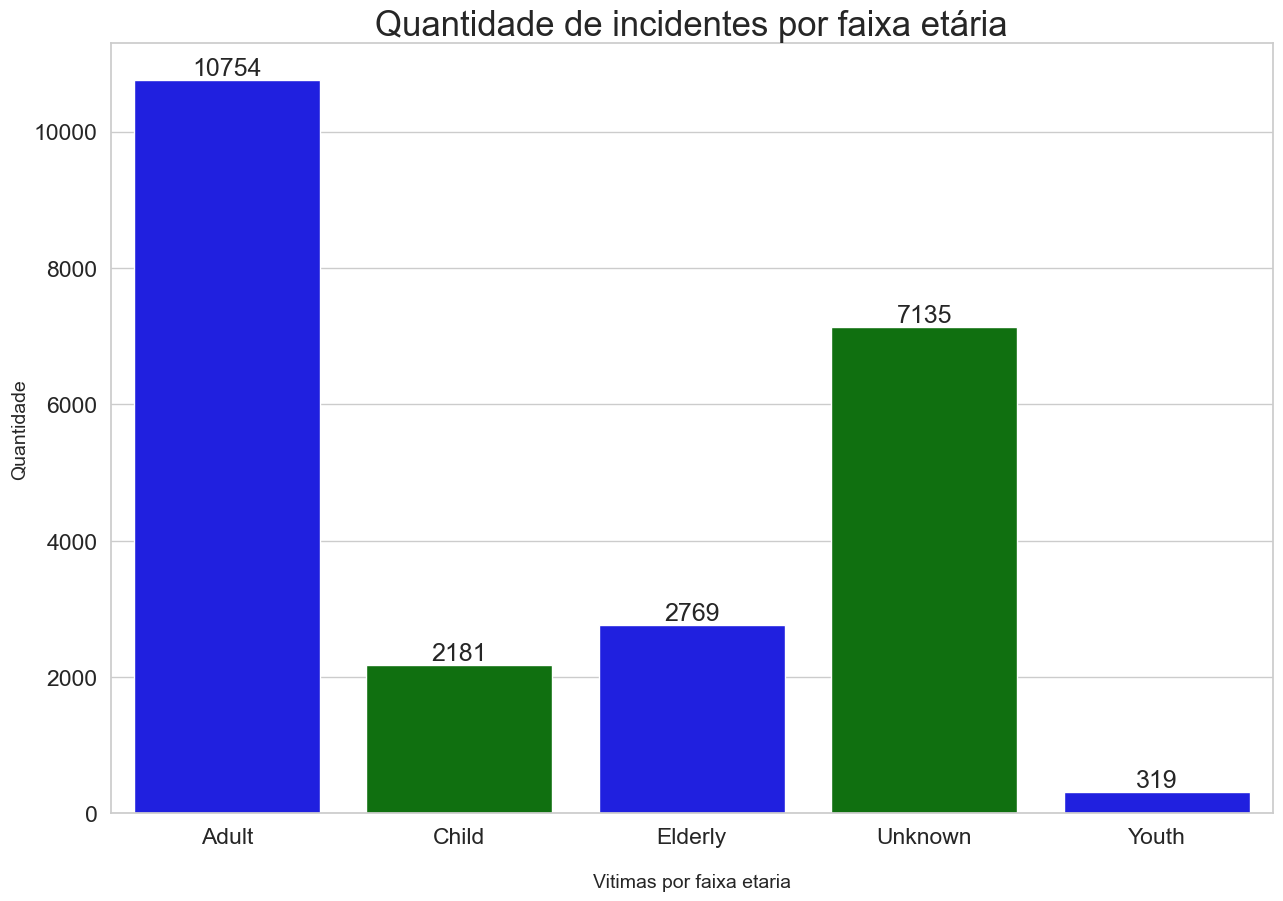

In [20]:

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Chart
chart = sns.barplot(x='Victims_Age',
                    y='Total',
                    data=df_faixa_etaria_incidente,
                    palette=["blue", "green"])
chart.set_title("Quantidade de incidentes por faixa etária", fontsize=25)
chart.bar_label(chart.containers[0])

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nVitimas por faixa etaria", fontsize=14)
chart.set_ylabel("Quantidade", fontsize=14);





### Pergunta 3 - Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [21]:
df_perc_incidente = df['Incident_Event_Type'].value_counts() / len(df) * 100
df_perc_incidente = pd.DataFrame(df_perc_incidente).reset_index()
df_perc_incidente.columns = ['Incident_Event_Type', 'Percentual']
df_perc_incidente

,Incident_Event_Type,Percentual
0,Slip Trip Fall,30.145090
1,Onboard Injuries,28.340098
2,Personal Injury,19.846273
3,Collision Incident,17.989464
4,Assault,2.547716
5,Activity Incident Event,0.492270
6,Vandalism Hooliganism,0.315226
7,Safety Critical Failure,0.284999
8,Fire,0.025909
9,Robbery,0.012954


In [22]:
df_perc_incidente = df.groupby('Incident_Event_Type').agg(Percentual=('Incident_Event_Type', 'count')).reset_index()
df_perc_incidente['Percentual'] = round(df_perc_incidente['Percentual'] / len(df) * 100, 2)
df_perc_incidente

,Incident_Event_Type,Percentual
0,Activity Incident Event,0.49
1,Assault,2.55
2,Collision Incident,17.99
3,Fire,0.03
4,Onboard Injuries,28.34
5,Personal Injury,19.85
6,Robbery,0.01
7,Safety Critical Failure,0.28
8,Slip Trip Fall,30.15
9,Vandalism Hooliganism,0.32


In [23]:
sqldf(
    "SELECT Incident_Event_Type,  COUNT(*) * 100 / SUM(COUNT(*)) OVER() AS Percentual FROM df GROUP BY Incident_Event_Type")

,Incident_Event_Type,Percentual
0,Activity Incident Event,0
1,Assault,2
2,Collision Incident,17
3,Fire,0
4,Onboard Injuries,28
5,Personal Injury,19
6,Robbery,0
7,Safety Critical Failure,0
8,Slip Trip Fall,30
9,Vandalism Hooliganism,0


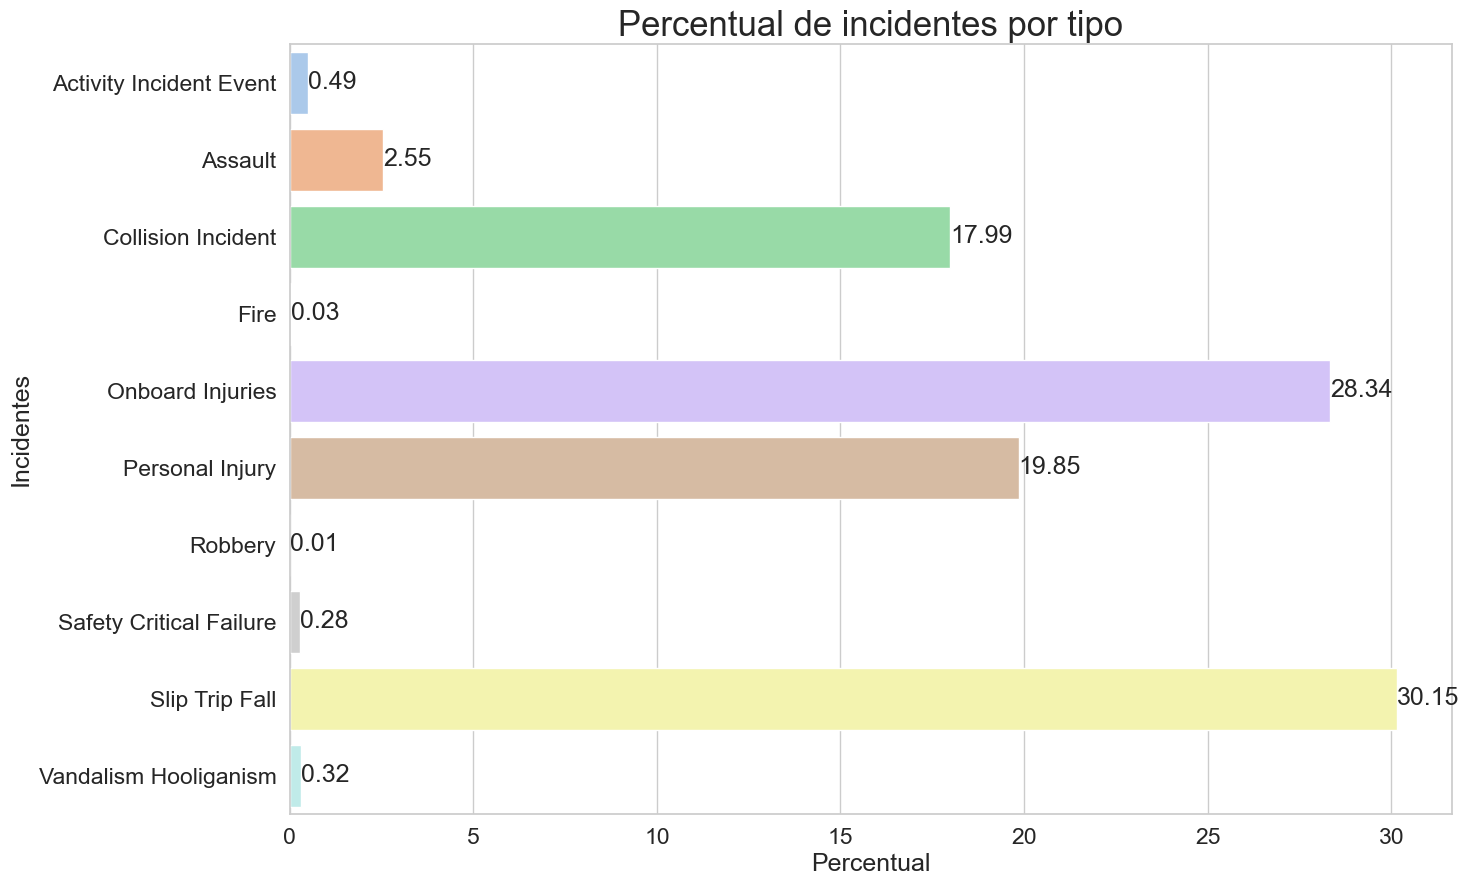

In [24]:
# Tamanho da figura
plt.figure(figsize=(15, 10))

# Chart
chart = sns.barplot(x='Percentual',
                    y='Incident_Event_Type',
                    data=df_perc_incidente,
                    orient='h',
                    palette='pastel')

chart.set_title("Percentual de incidentes por tipo", fontsize=25)
chart.bar_label(chart.containers[0])
# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set(xlabel="Percentual", ylabel="Incidentes");




### Pergunta 4 - Como foi a evolução de incidentes por mês ao longo do tempo?

In [25]:
df["Month"] = df.Date_Incident.dt.month

In [26]:
df[["Year", "Month"]]

,Year,Month
0,2015,1
1,2015,1
2,2015,1
3,2015,1
4,2015,1
...,...,...
23153,2018,9
23154,2018,9
23155,2018,9
23156,2018,9


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date_Incident              23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group_Name                 23158 non-null  object        
 5   Bus_Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury_Result_Description  23158 non-null  object        
 8   Incident_Event_Type        23158 non-null  object        
 9   Victim_Category            23158 non-null  object        
 10  Victims_Sex                23158 non-null  object        
 11  Victims_Age                23158 non-null  object        
 12  Mont

In [28]:
sqldf("SELECT YEAR, Month, COUNT(*) as Number_Incidents FROM df GROUP BY Year, Month")

,Year,Month,Number_Incidents
0,2015,1,399
1,2015,2,371
2,2015,3,460
3,2015,4,470
4,2015,5,472
5,2015,6,564
6,2015,7,558
7,2015,8,446
8,2015,9,487
9,2015,10,470


In [29]:
df['Month_Year'] = df.Date_Incident.dt.strftime('%Y-%m')

In [30]:
df_evo_incidente = df.groupby("Month_Year").agg(Total=('Incident_Event_Type', 'count')).reset_index()
df_evo_incidente


,Month_Year,Total
0,2015-01,399
1,2015-02,371
2,2015-03,460
3,2015-04,470
4,2015-05,472
5,2015-06,564
6,2015-07,558
7,2015-08,446
8,2015-09,487
9,2015-10,470


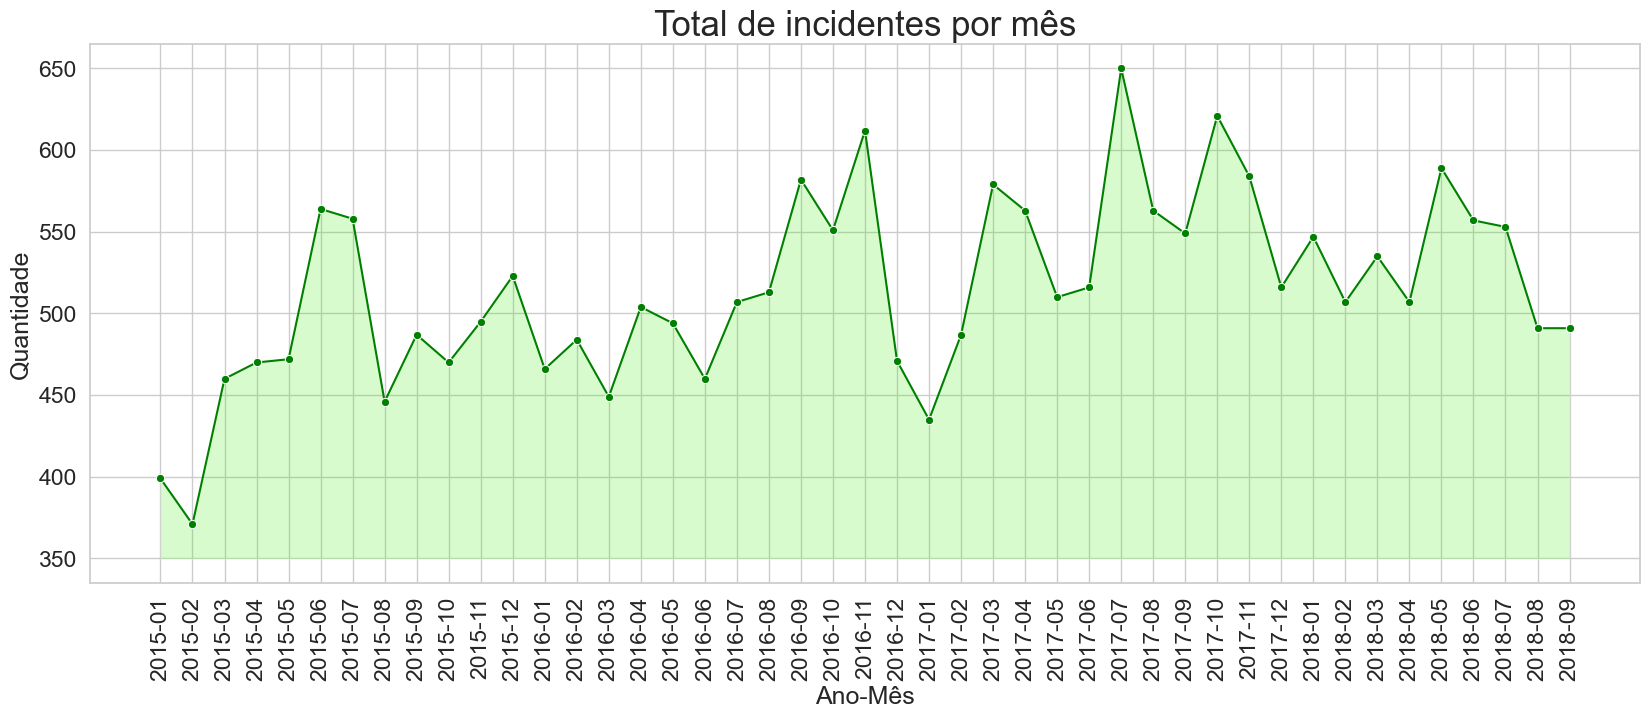

In [31]:
# Tamanho da figura
plt.figure(figsize=(20, 7))

# Chart
chart = sns.lineplot(x=df_evo_incidente['Month_Year'].astype(str),
                     y=df_evo_incidente['Total'],
                     marker='o',
                     color="green")
plt.fill_between(x=df_evo_incidente.Month_Year, y1=df_evo_incidente.Total, y2=350, alpha=0.2)
chart.tick_params(axis='x', labelrotation=90)

chart.set_title("Total de incidentes por mês", fontsize=25)

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set(xlabel="Ano-Mês", ylabel="Quantidade");


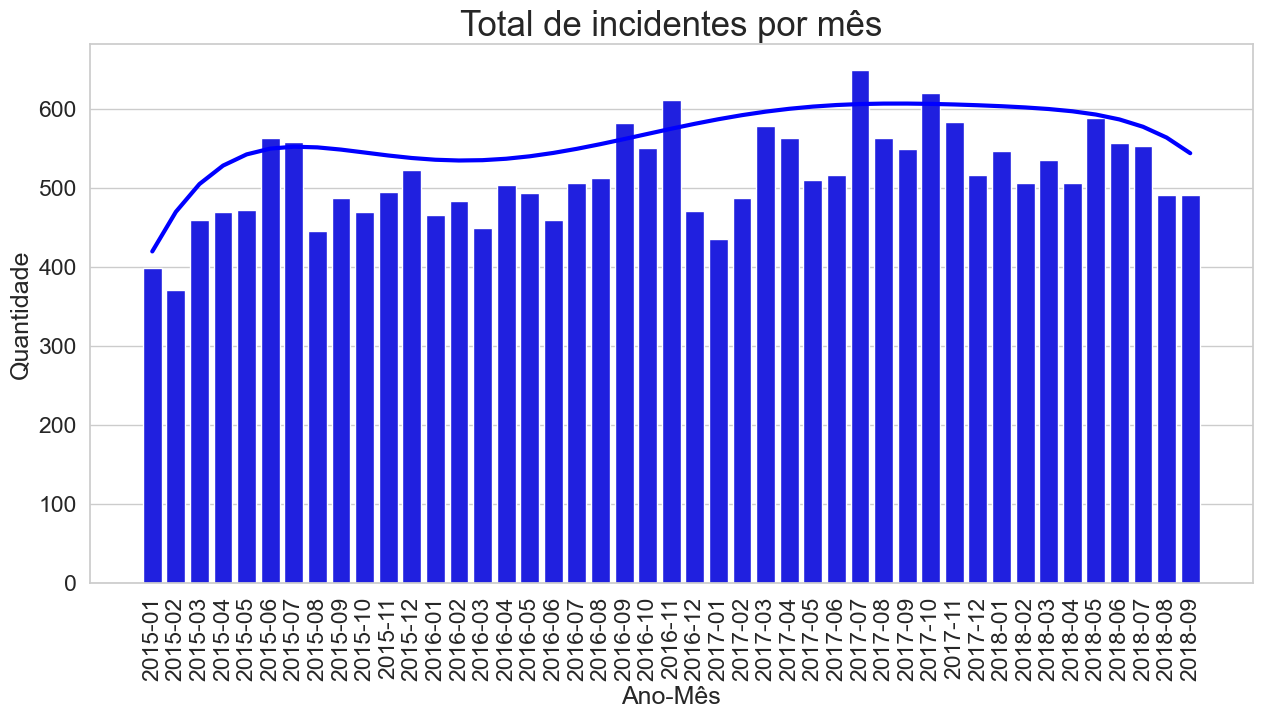

In [32]:
# Tamanho da figura
plt.figure(figsize=(15, 7))

# Chart
chart = sns.barplot(x=df_evo_incidente['Month_Year'].astype(str),
                    y=df_evo_incidente['Total'],
                    color='blue')

x = np.arange(0, df_evo_incidente.shape[0], 1)
y = np.array(df_evo_incidente.Total.values)
z = np.polyfit(x, y, 7)
p = np.poly1d(z)

sns.lineplot(x=x,
             y=p(x) + 50,
             color='blue',
             linewidth=3)
chart.tick_params(axis='x', labelrotation=90)

chart.set_title("Total de incidentes por mês", fontsize=25)

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set(xlabel="Ano-Mês", ylabel="Quantidade");

In [33]:
sqldf("SELECT  Month, COUNT(*) as Number_Incidents FROM df GROUP BY Month")

,Month,Number_Incidents
0,1,1847
1,2,1849
2,3,2023
3,4,2044
4,5,2065
5,6,2097
6,7,2268
7,8,2013
8,9,2109
9,10,1642


In [34]:
df_evo_incidente_mes = df.groupby("Month").agg(Total=('Incident_Event_Type', 'count')).reset_index()
df_evo_incidente_mes

,Month,Total
0,1,1847
1,2,1849
2,3,2023
3,4,2044
4,5,2065
5,6,2097
6,7,2268
7,8,2013
8,9,2109
9,10,1642


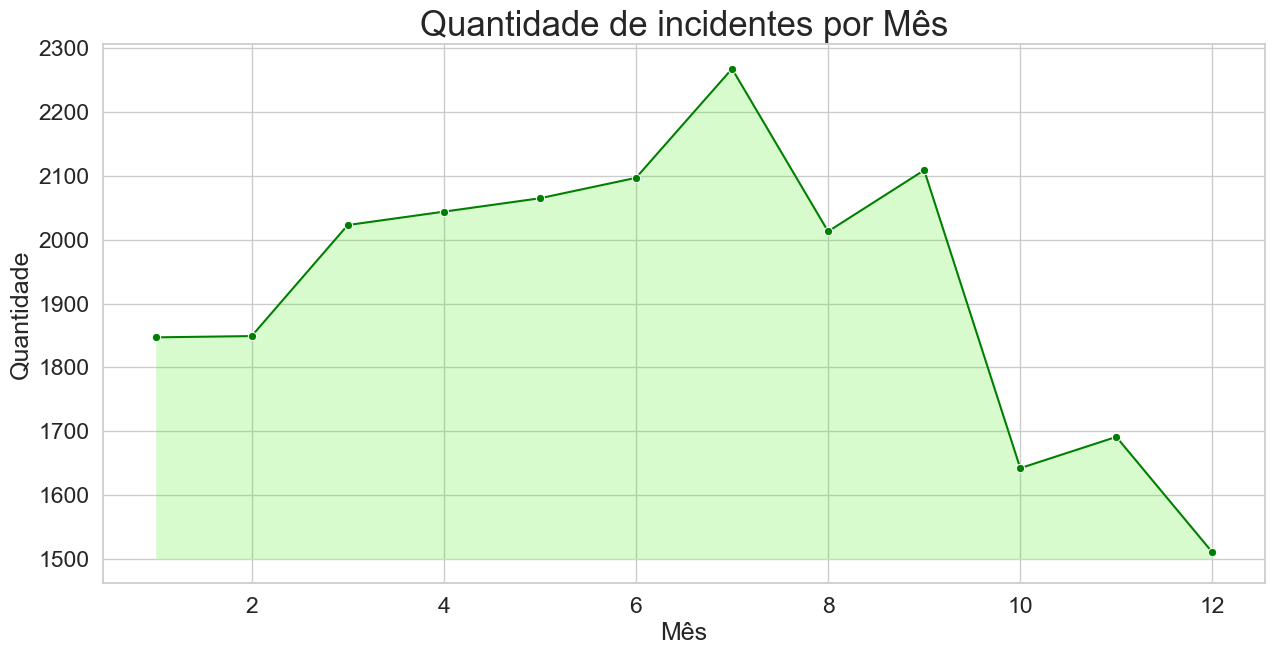

In [35]:
# Tamanho da figura
plt.figure(figsize=(15, 7))

# Chart
chart = sns.lineplot(x='Month',
                     y='Total',
                     data=df_evo_incidente_mes,
                     marker='o',
                     color="green")
plt.fill_between(x=df_evo_incidente_mes.Month, y1=df_evo_incidente_mes.Total, y2=1500, alpha=0.2)
chart.set_title("Quantidade de incidentes por Mês", fontsize=25)

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set(xlabel="Mês", ylabel="Quantidade");

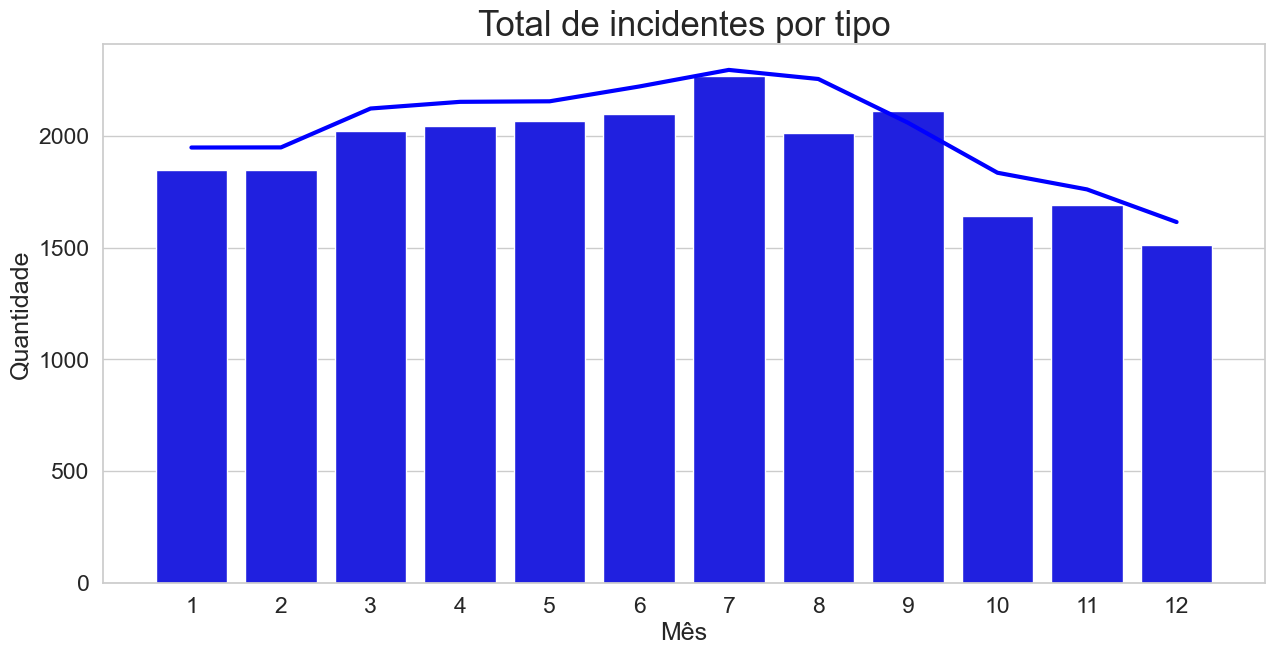

In [36]:
# Tamanho da figura
plt.figure(figsize=(15, 7))

# Chart
chart = sns.barplot(x='Month',
                    y='Total',
                    data=df_evo_incidente_mes,
                    color='blue')

x = np.arange(0, df_evo_incidente_mes.shape[0], 1)
y = np.array(df_evo_incidente_mes.Total.values)
z = np.polyfit(x, y, 7)
p = np.poly1d(z)
sns.lineplot(x=x,
             y=p(x) + 100,
             color='blue',
             linewidth=3)

chart.set_title("Total de incidentes por tipo", fontsize=25)

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set(xlabel="Mês", ylabel="Quantidade");

### Pergunta 5 - Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

In [37]:
df[(df['Incident_Event_Type'] == 'Collision Incident') & (df['Victims_Sex'] == 'Female')].groupby('Month').agg(
    Total=('Victims_Sex', 'count')).sort_values(by='Total', ascending=False).head(1)

,Total
Month,
9,158


In [38]:
sqldf(
    "SELECT  Month, COUNT(*) as Total_collision FROM df WHERE Victims_Sex=='Female' and Incident_Event_Type =='Collision Incident' GROUP BY Month ORDER BY Total_collision DESC LIMIT 1")

,Month,Total_collision
0,9,158


In [39]:
df_incident_collision_female = df[
    (df['Incident_Event_Type'] == 'Collision Incident') & (df['Victims_Sex'] == 'Female')].groupby('Month').agg(
    Total=('Victims_Sex', 'count')).sort_values(by='Month').reset_index()
df_incident_collision_female

,Month,Total
0,1,137
1,2,116
2,3,129
3,4,147
4,5,123
5,6,150
6,7,147
7,8,122
8,9,158
9,10,113


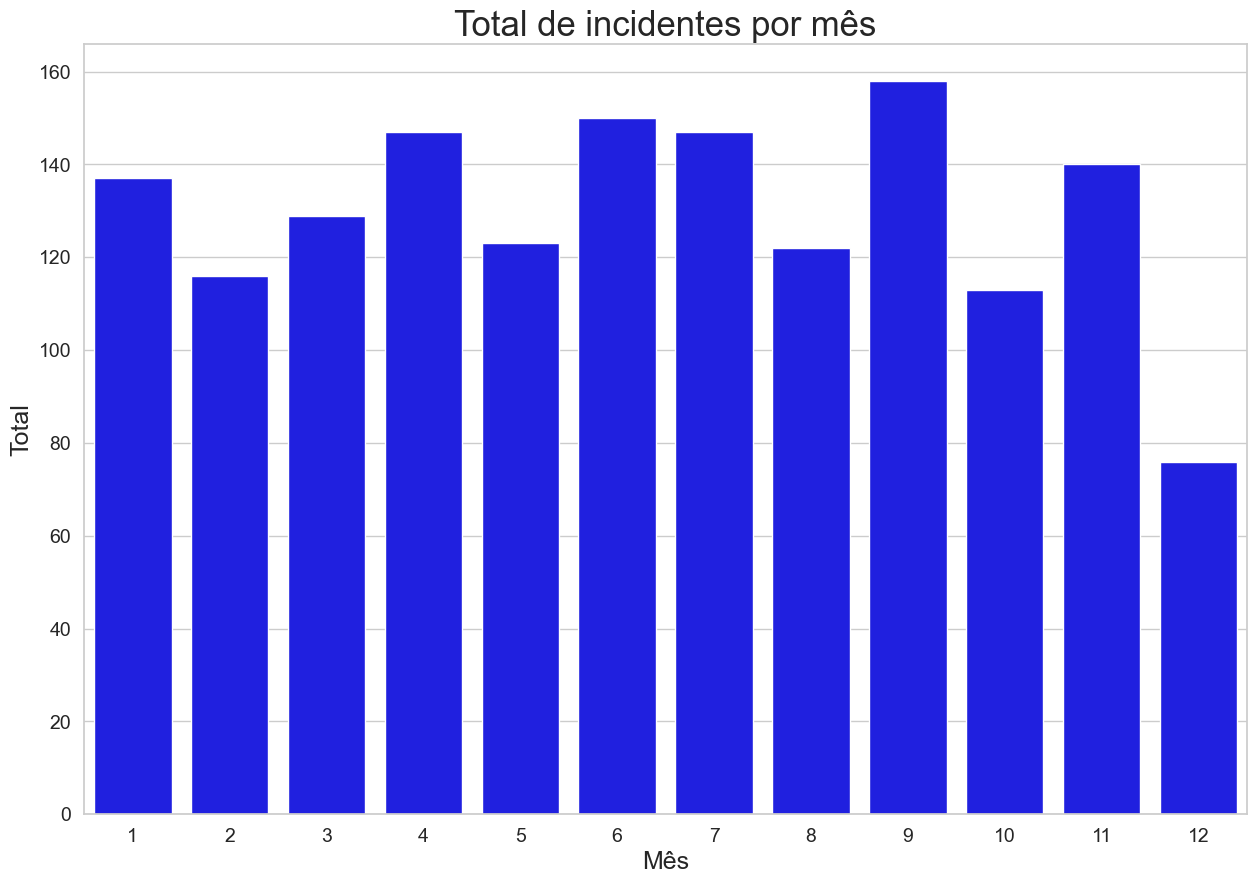

In [40]:
# Tamanho da figura
plt.figure(figsize=(15, 10))

# Chart
chart = sns.barplot(x='Month',
                    y='Total',
                    data=df_incident_collision_female,
                    color='blue')

chart.set_title("Total de incidentes por mês", fontsize=25)

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
plt.xlabel("Mês")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


### Pergunta 6 -Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [41]:
df_media_mes_child = df[df.Victims_Age == 'Child'].groupby(['Year', 'Month']).agg(
    Total=('Victims_Age', 'count')).groupby('Month').agg(
    Media_mes=('Total', 'mean')).reset_index()

df_media_mes_child

,Month,Media_mes
0,1,31.500000
1,2,36.500000
2,3,47.500000
3,4,56.500000
4,5,51.500000
5,6,61.250000
6,7,58.000000
7,8,52.000000
8,9,56.250000
9,10,50.000000


In [42]:
sqldf(
    "SELECT Month, AVG(Total) from (SELECT  Year, Month, COUNT(*) as Total FROM df where Victims_Age == 'Child' GROUP BY Year, Month) temp  GROUP BY Month ")

,Month,AVG(Total)
0,1,31.500000
1,2,36.500000
2,3,47.500000
3,4,56.500000
4,5,51.500000
5,6,61.250000
6,7,58.000000
7,8,52.000000
8,9,56.250000
9,10,50.000000


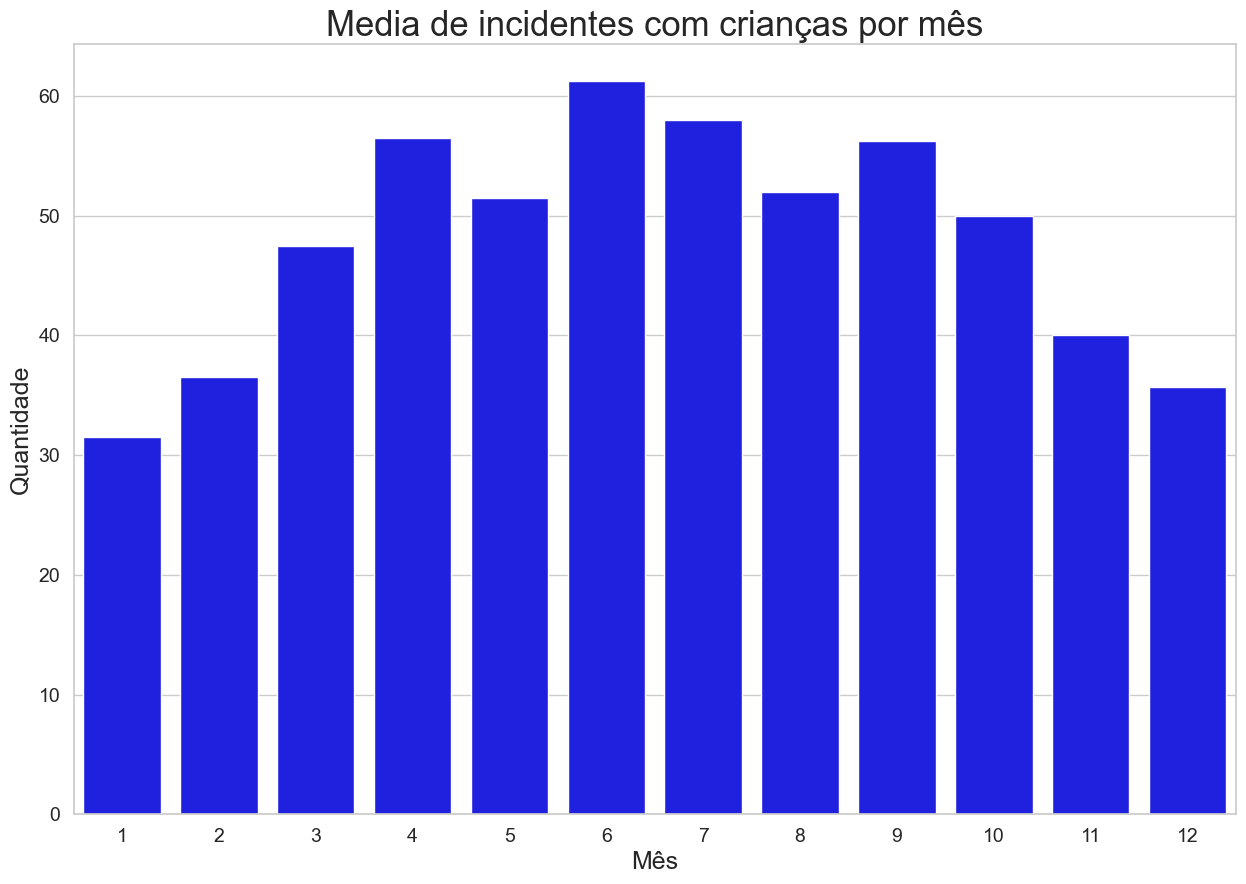

In [43]:
# Tamanho da figura
plt.figure(figsize=(15, 10))

# Chart
chart = sns.barplot(x='Month',
                    y='Media_mes',
                    data=df_media_mes_child,
                    color='blue')

chart.set_title("Media de incidentes com crianças por mês", fontsize=25)

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

### Pergunta 7 - Considerando a descrição de incidente como “Injuries treated on scene”, qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [44]:
df[(df.Injury_Result_Description == 'Injuries treated on scene') & (df.Victims_Sex != 'Unknown')].shape[0]


14448

In [45]:
sqldf(
    "SELECT COUNT(*) from df WHERE Injury_Result_Description =='Injuries treated on scene' and Victims_Sex!='Unknown' ")

,COUNT(*)
0,14448


### Pergunta 8 - No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

In [46]:
df[(df.Year == 2017) & (df.Victims_Age == 'Elderly')].groupby('Month').agg(
    Total=('Victims_Age', 'count')).sort_values(by='Total', ascending=False).reset_index().head(1)

,Month,Total
0,7,81


In [47]:
sqldf(
    "SELECT Month, COUNT(*) as Total from df WHERE Year == 2017 and Victims_Age =='Elderly' GROUP BY Month ORDER BY Total DESC LIMIT 1")

,Month,Total
0,7,81


### Pergunta 9 - Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

In [48]:
df["Incident_Event_Type"].unique()

array(['Onboard Injuries', 'Collision Incident', 'Assault',
       'Vandalism Hooliganism', 'Safety Critical Failure',
       'Personal Injury', 'Slip Trip Fall', 'Activity Incident Event',
       'Fire', 'Robbery'], dtype=object)

In [55]:
df_incidents_operator = df[['Operator', 'Month_Year']].groupby(['Month_Year', 'Operator']).agg(
    Total=('Operator', 'count')).reset_index()
df_incidents_operator

,Month_Year,Operator,Total
0,2015-01,Abellio London,11
1,2015-01,Abellio West,1
2,2015-01,Arriva Kent Thameside,14
3,2015-01,Arriva London North,57
4,2015-01,Arriva London South,27
...,...,...,...
831,2018-09,Metroline,72
832,2018-09,Metroline West,28
833,2018-09,Quality Line,7
834,2018-09,Selkent,54


In [54]:
sqldf("SELECT Month_Year,  Operator, COUNT(*) as Total from df GROUP BY  Operator, Month_Year")

,Month_Year,Operator,Total
0,2015-01,Abellio London,11
1,2015-02,Abellio London,6
2,2015-03,Abellio London,7
3,2015-04,Abellio London,9
4,2015-05,Abellio London,11
...,...,...,...
831,2018-06,Tower Transit,19
832,2018-07,Tower Transit,11
833,2018-08,Tower Transit,11
834,2018-09,Tower Transit,14


C:\Users\pniet\AppData\Local\Temp\ipykernel_2248\1944098446.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 10))


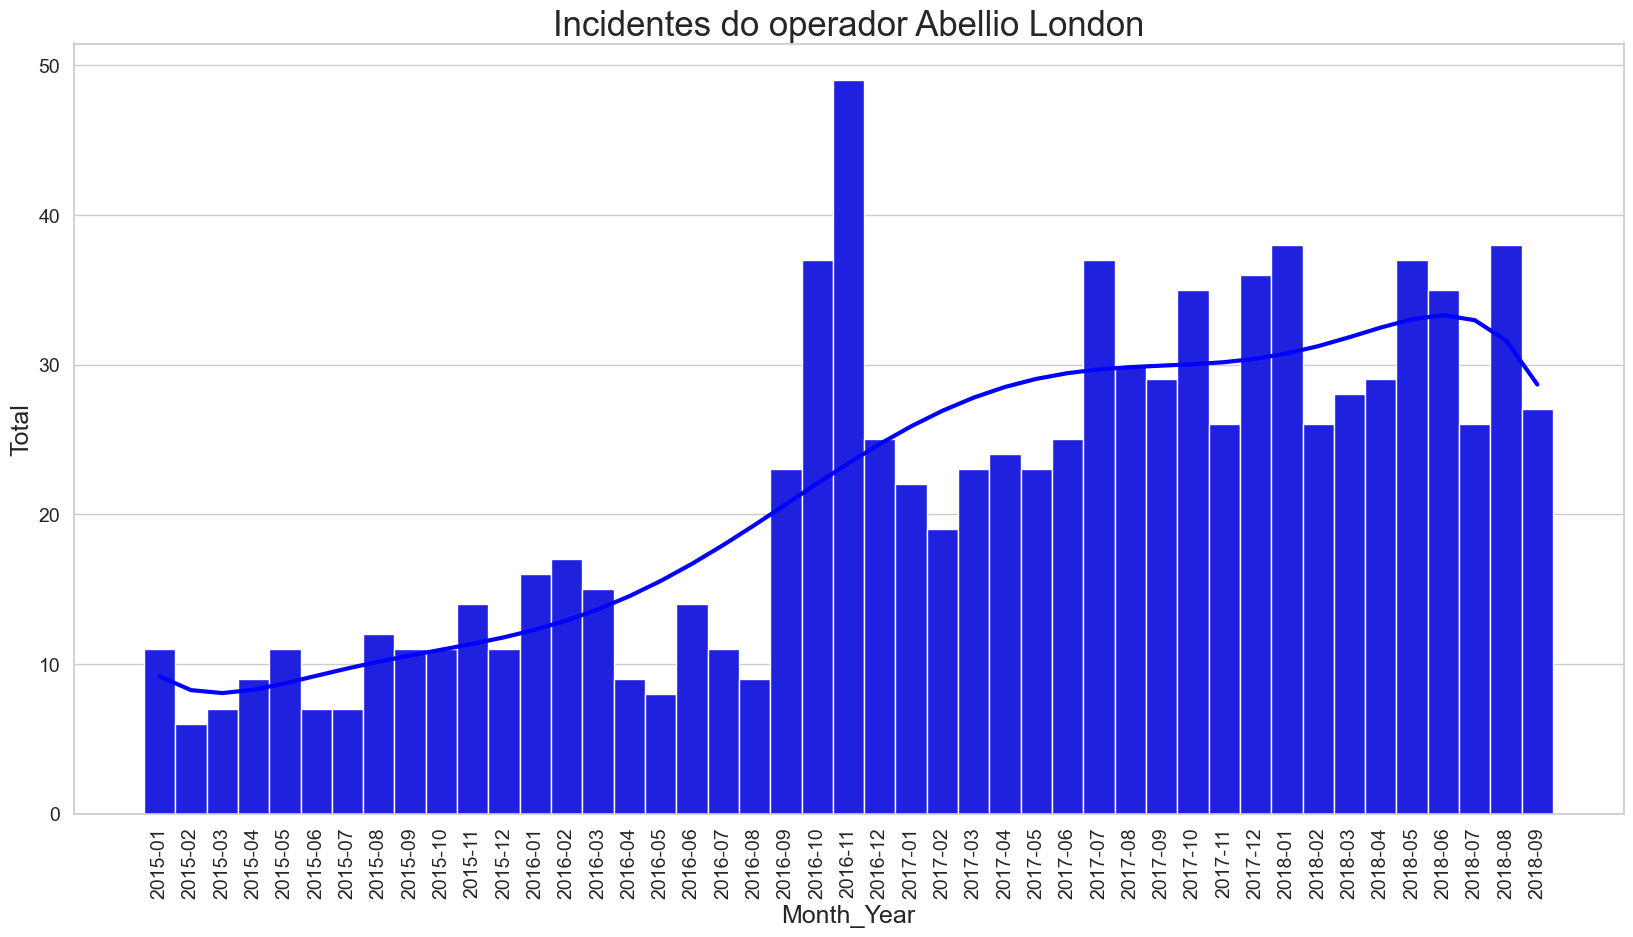

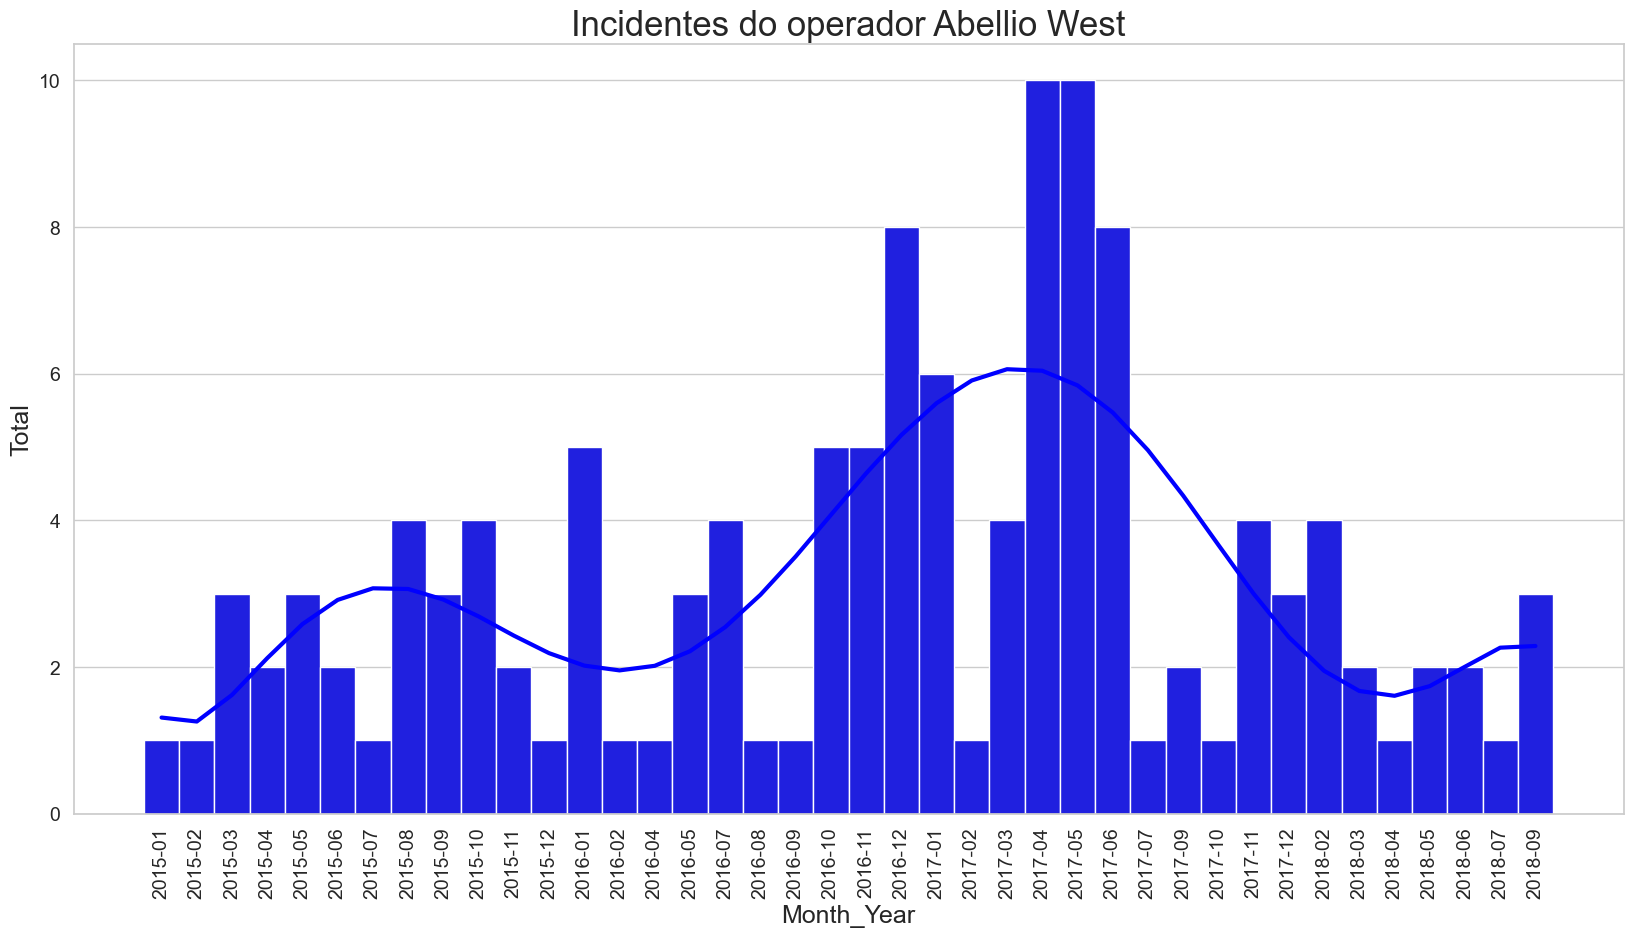

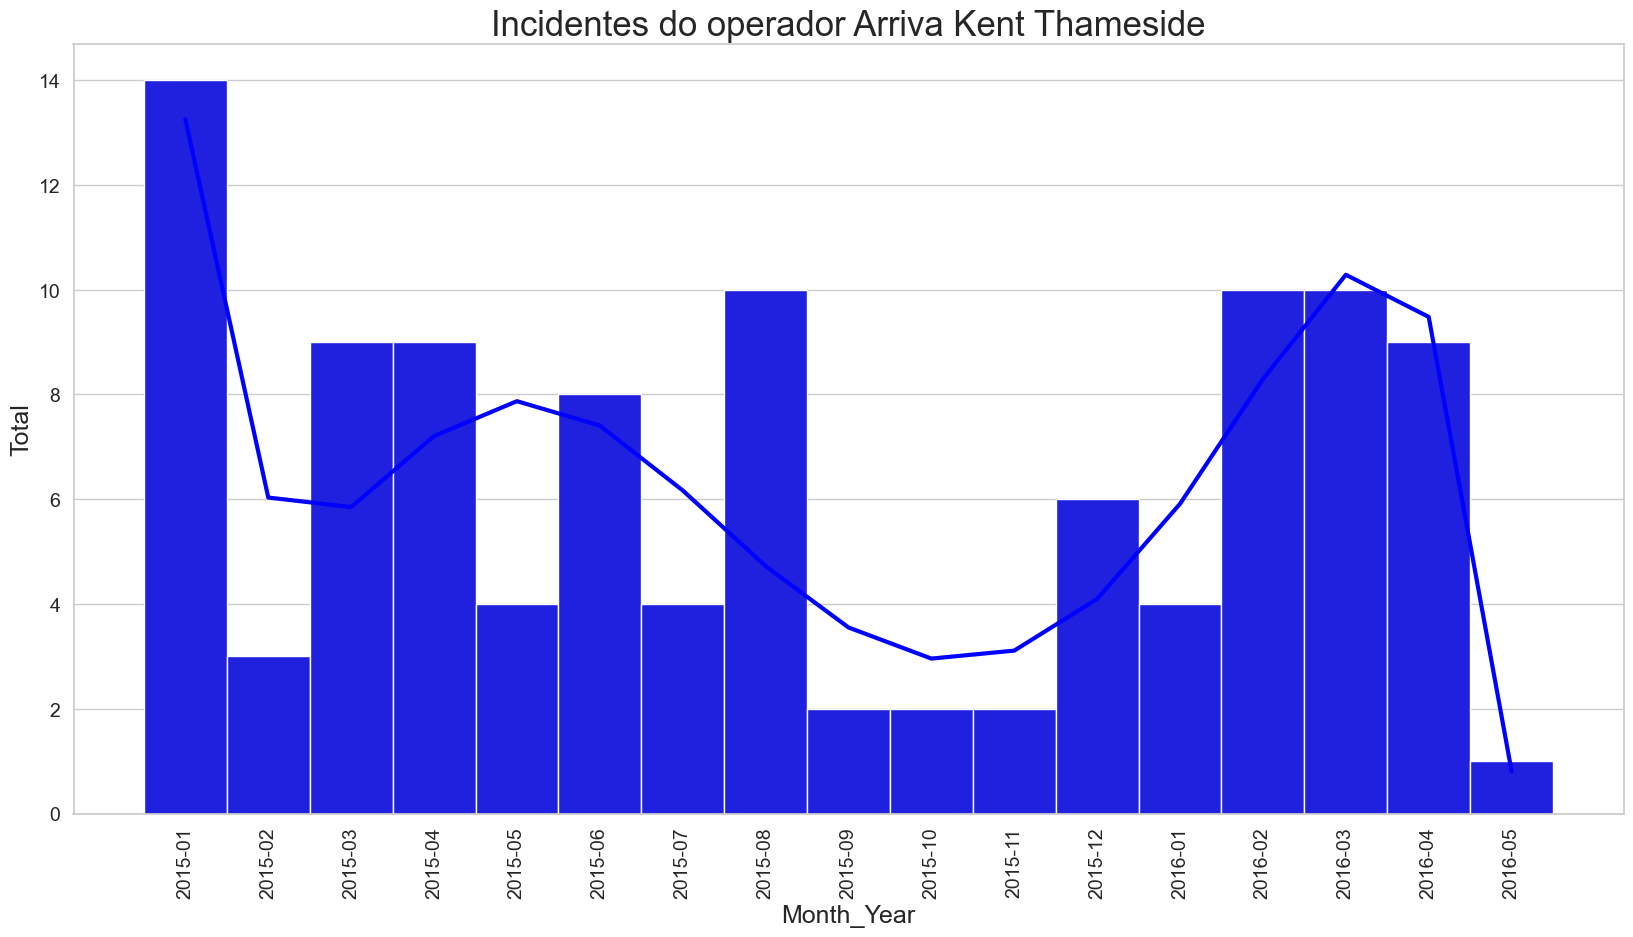

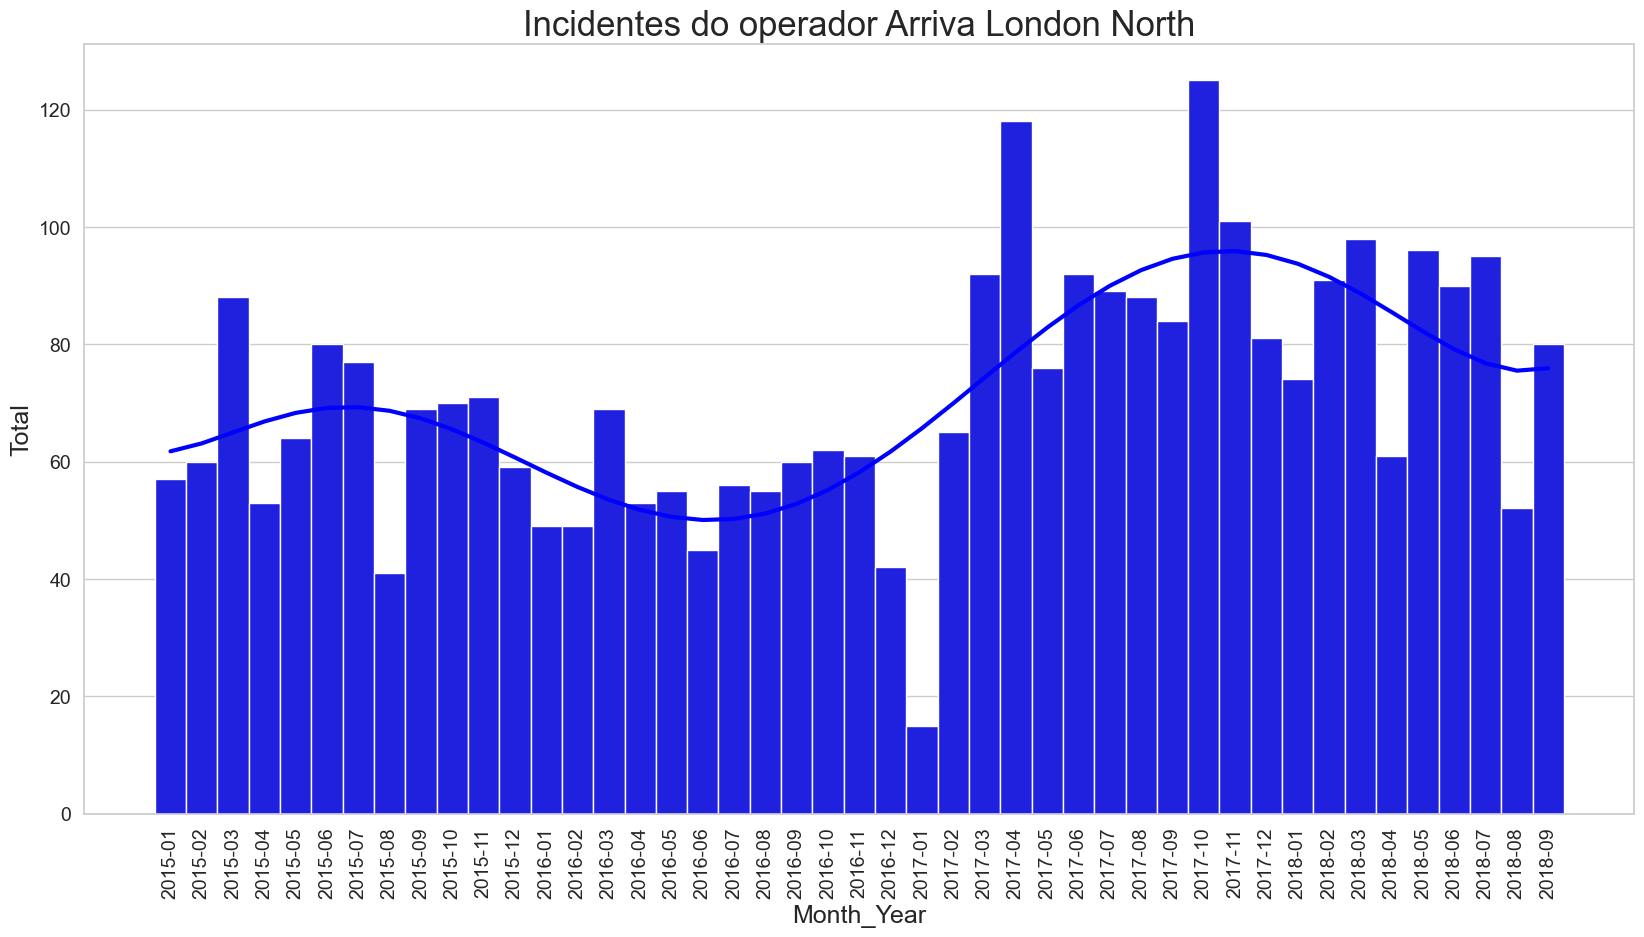

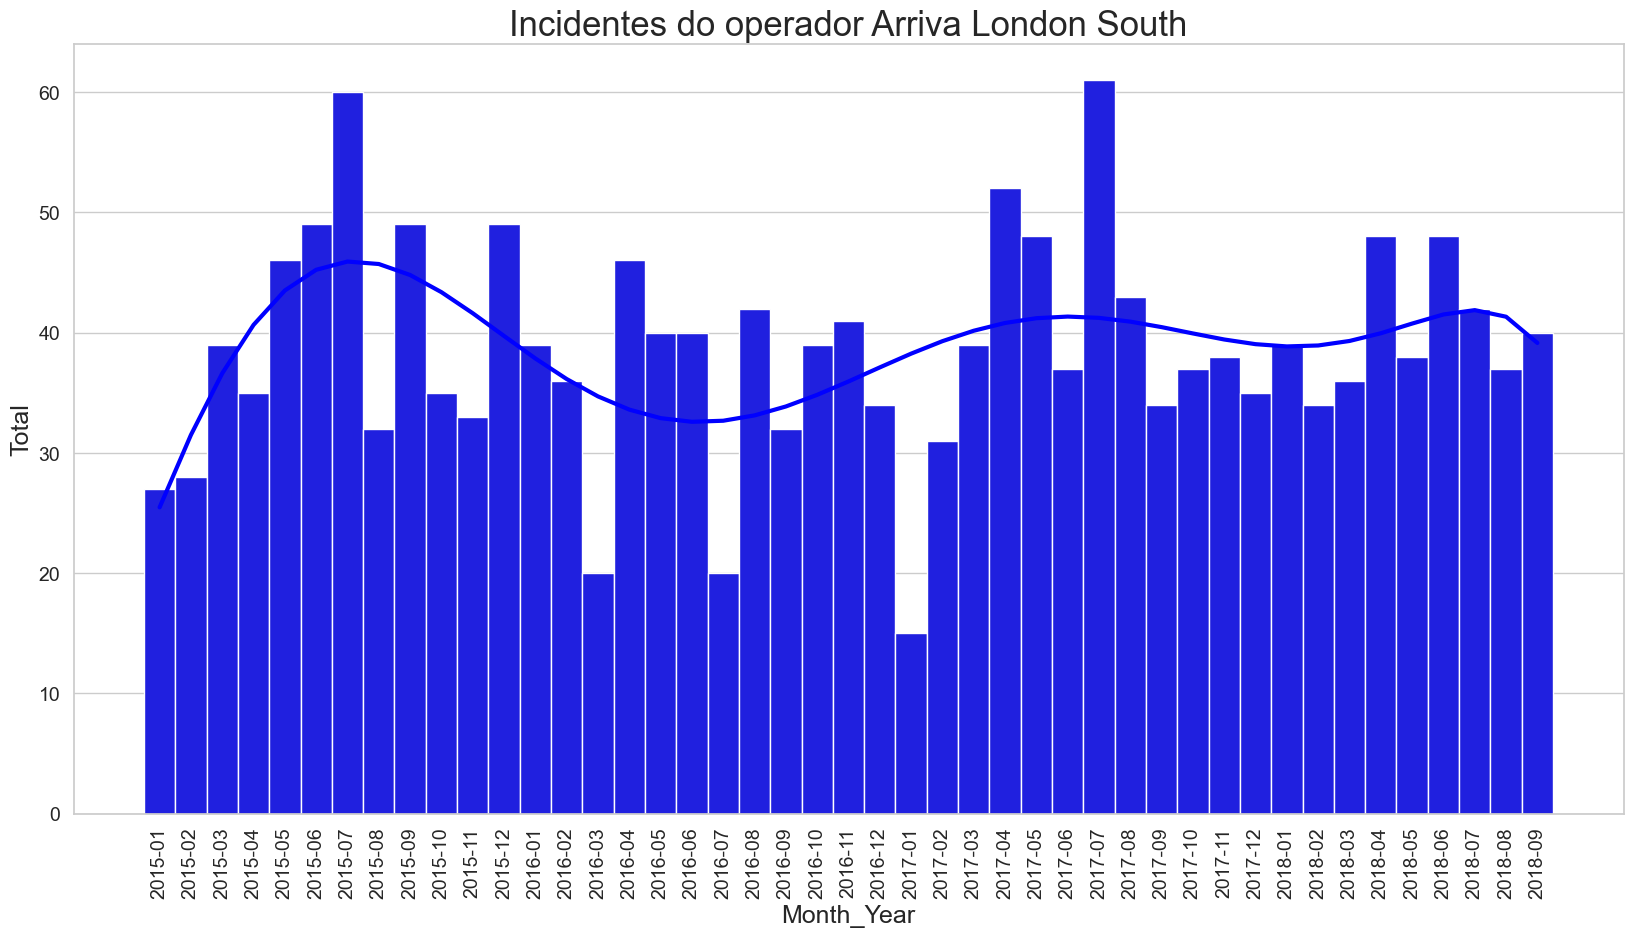

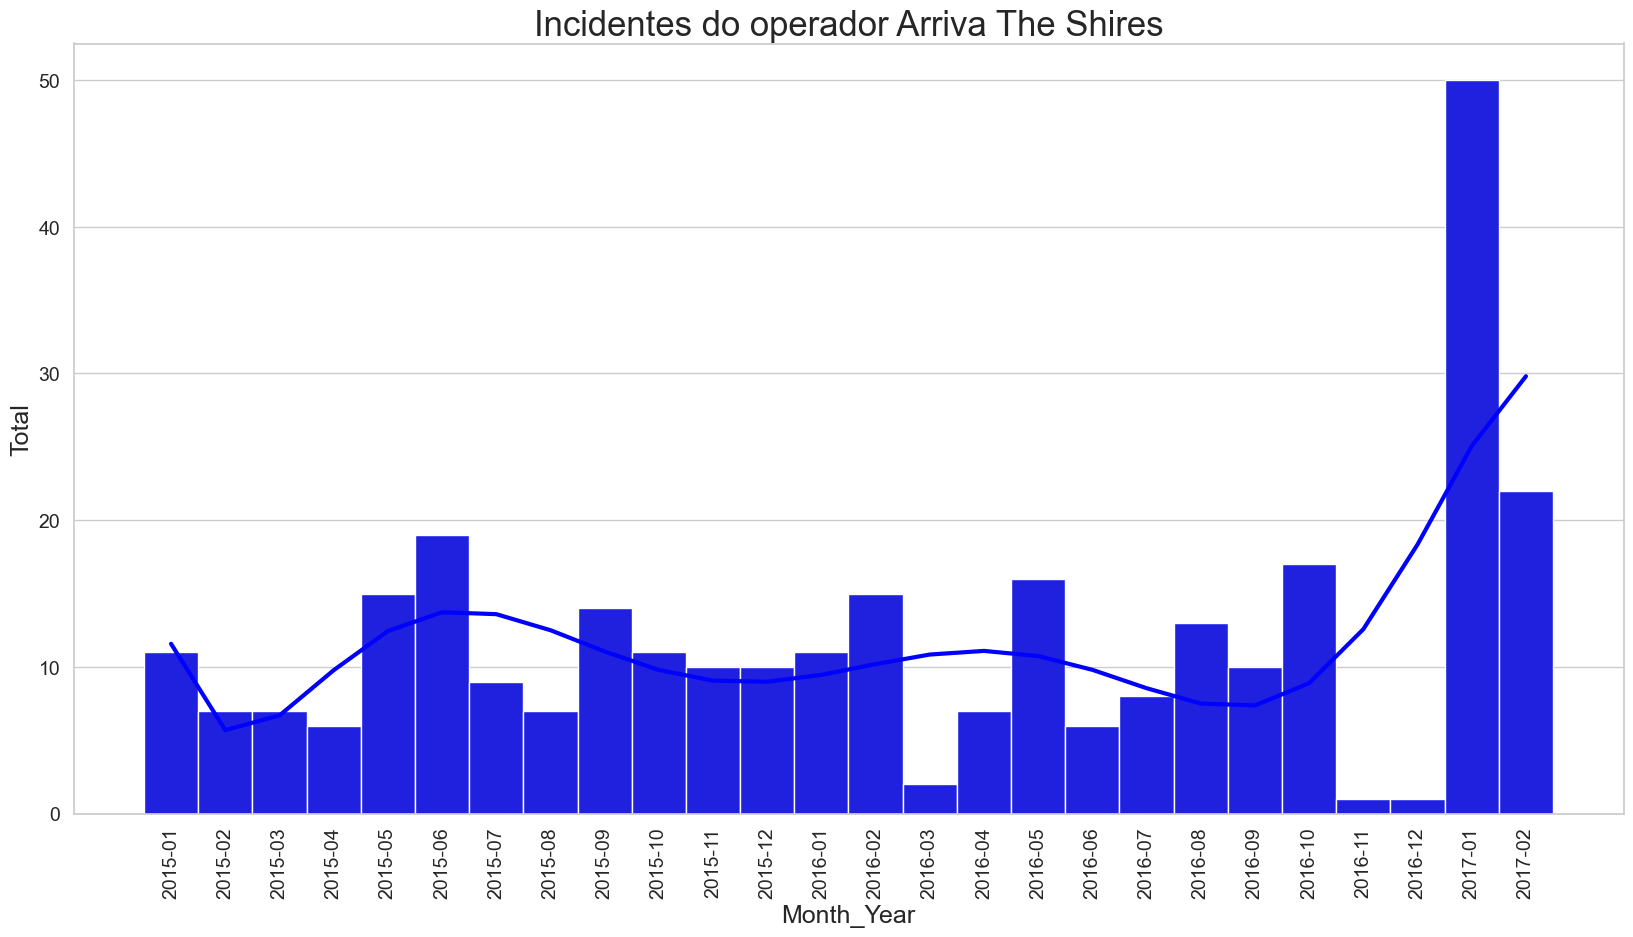

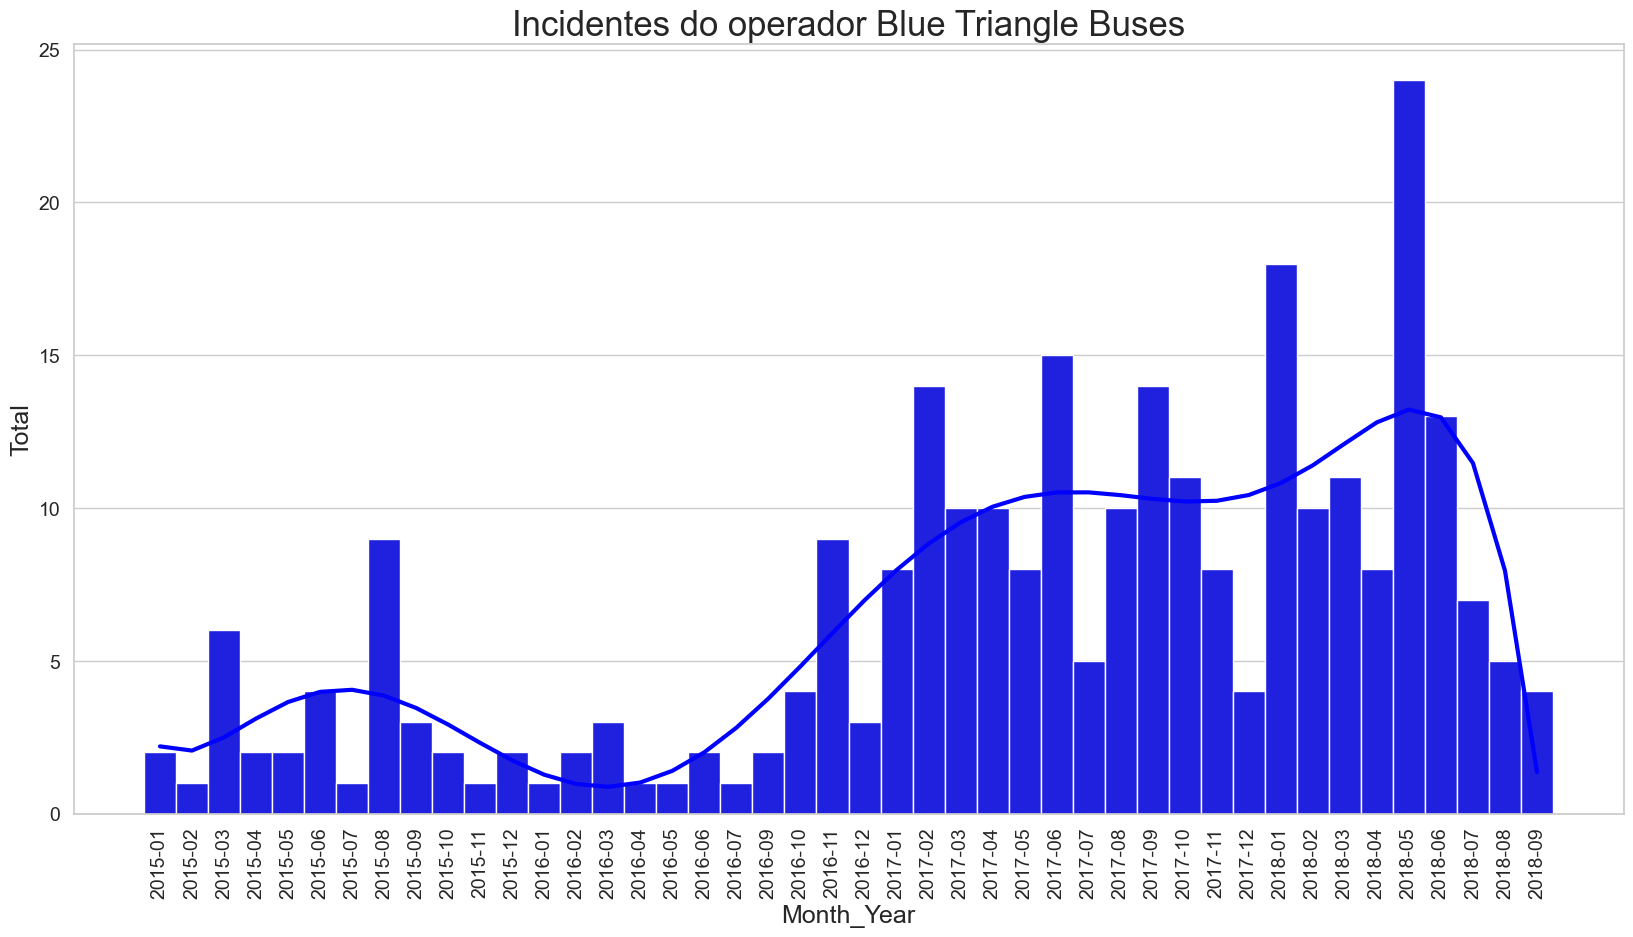

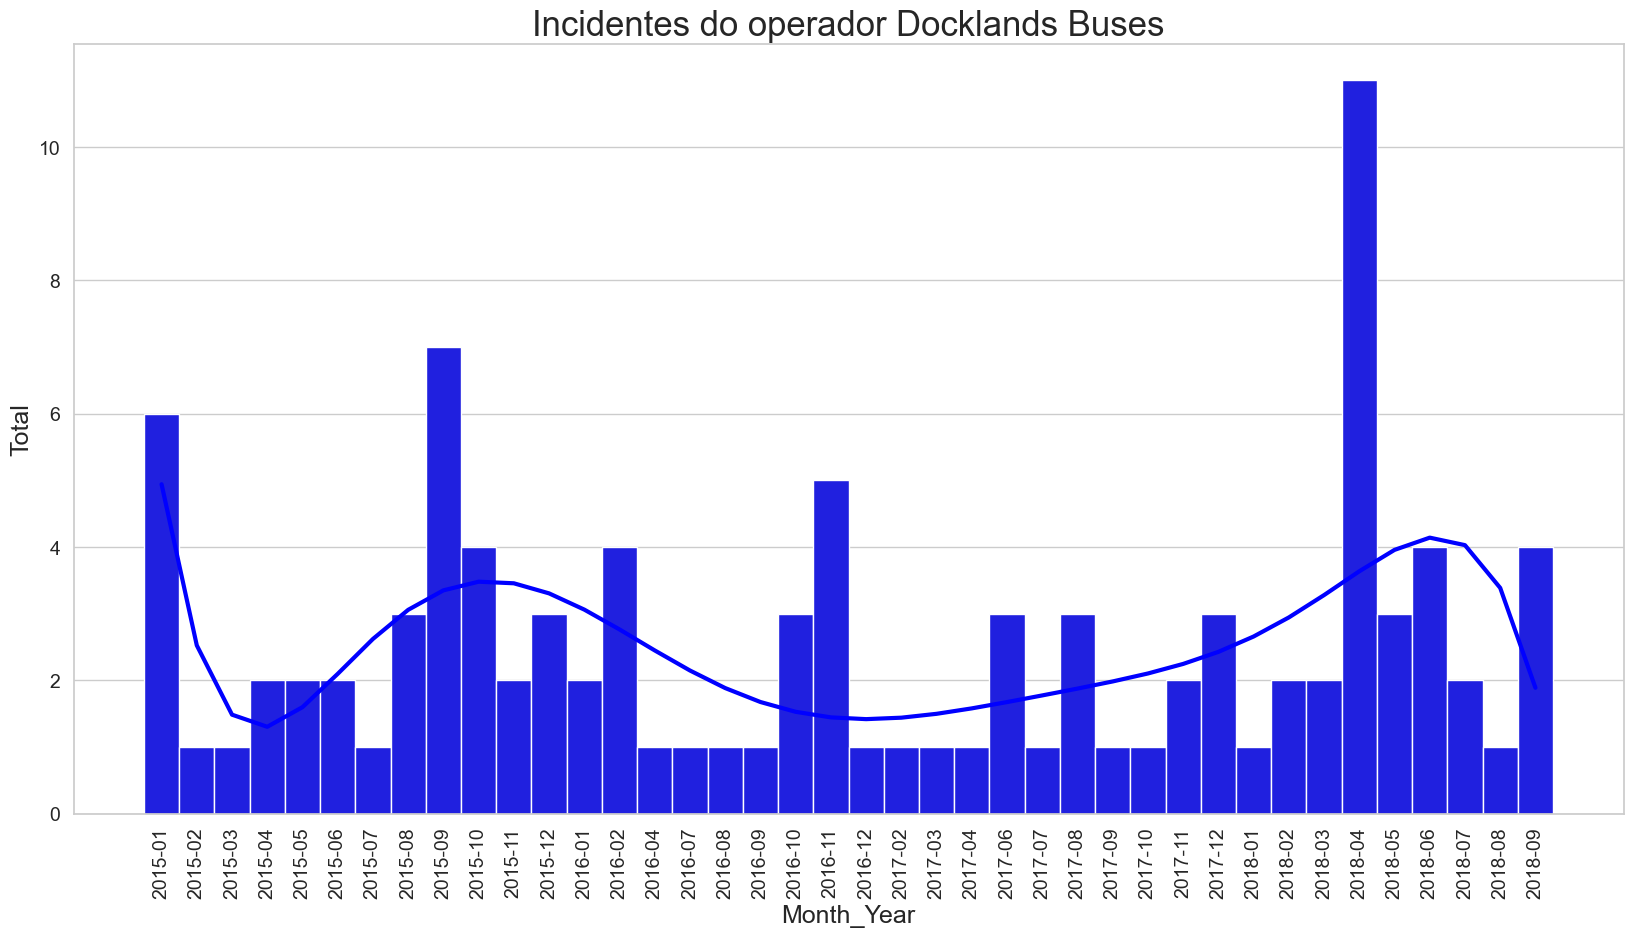

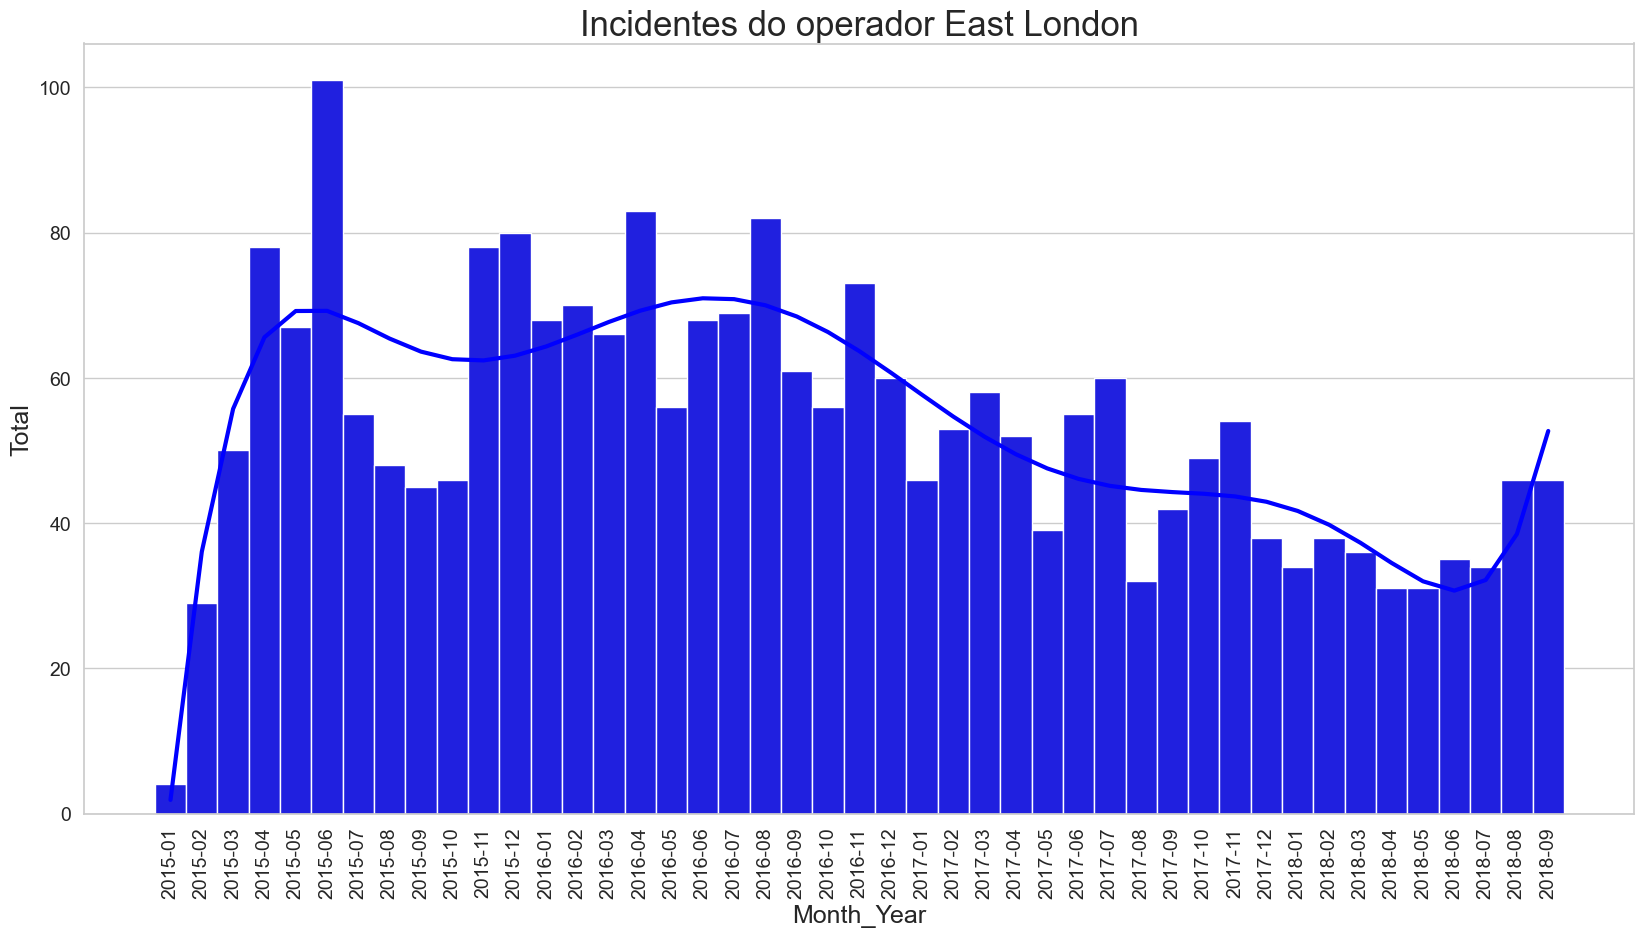

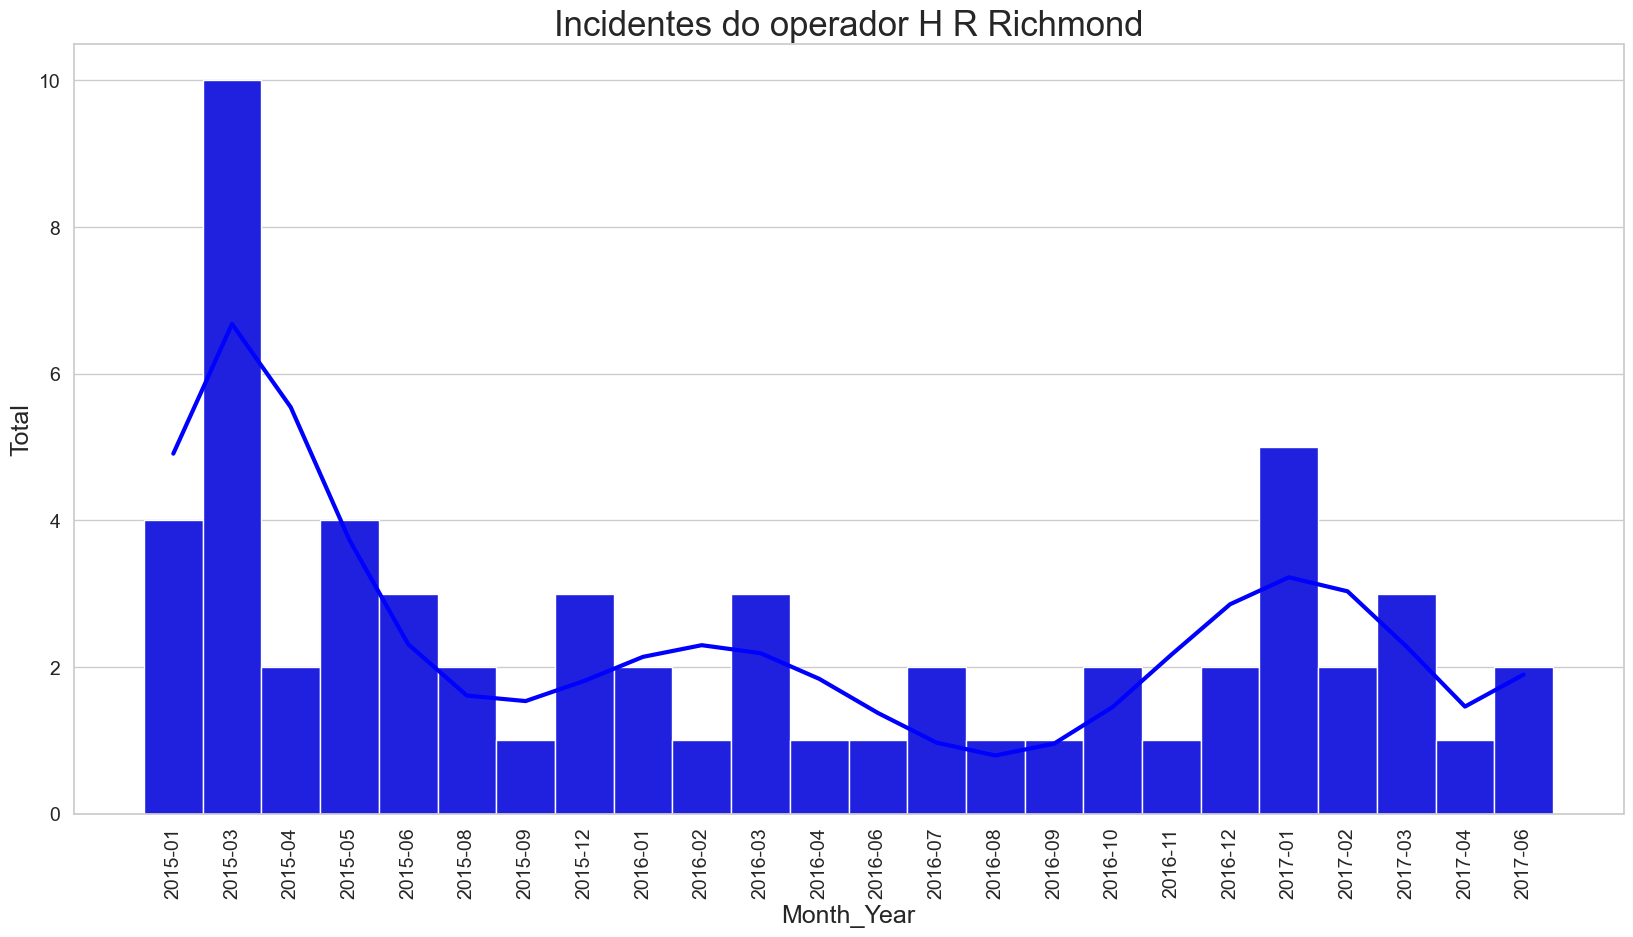

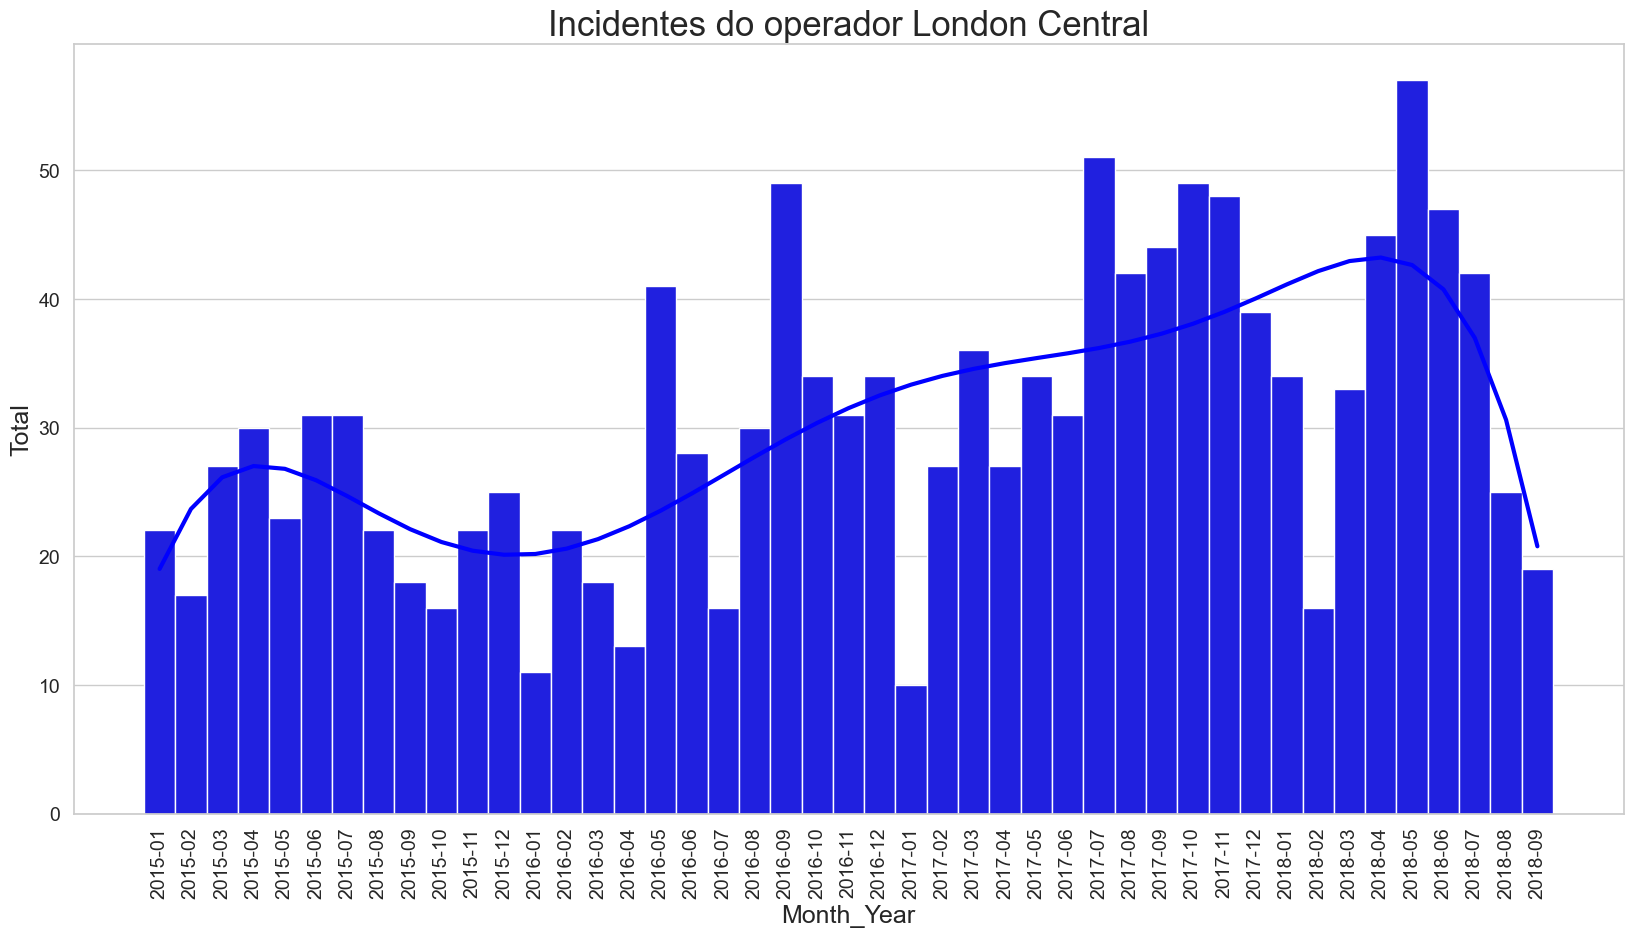

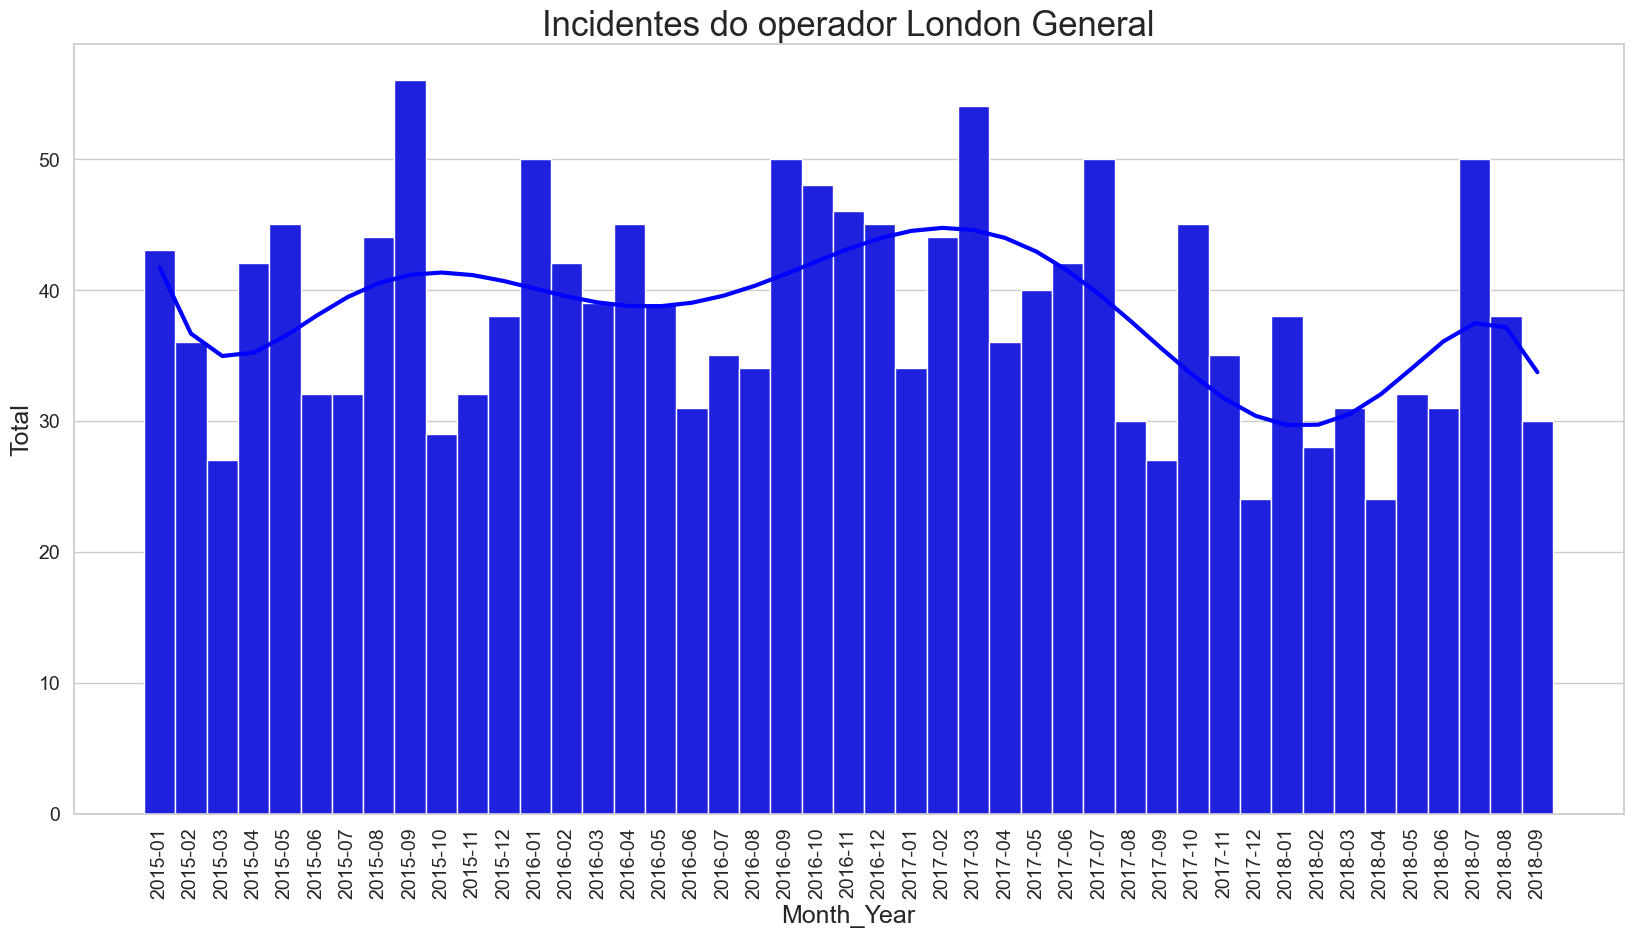

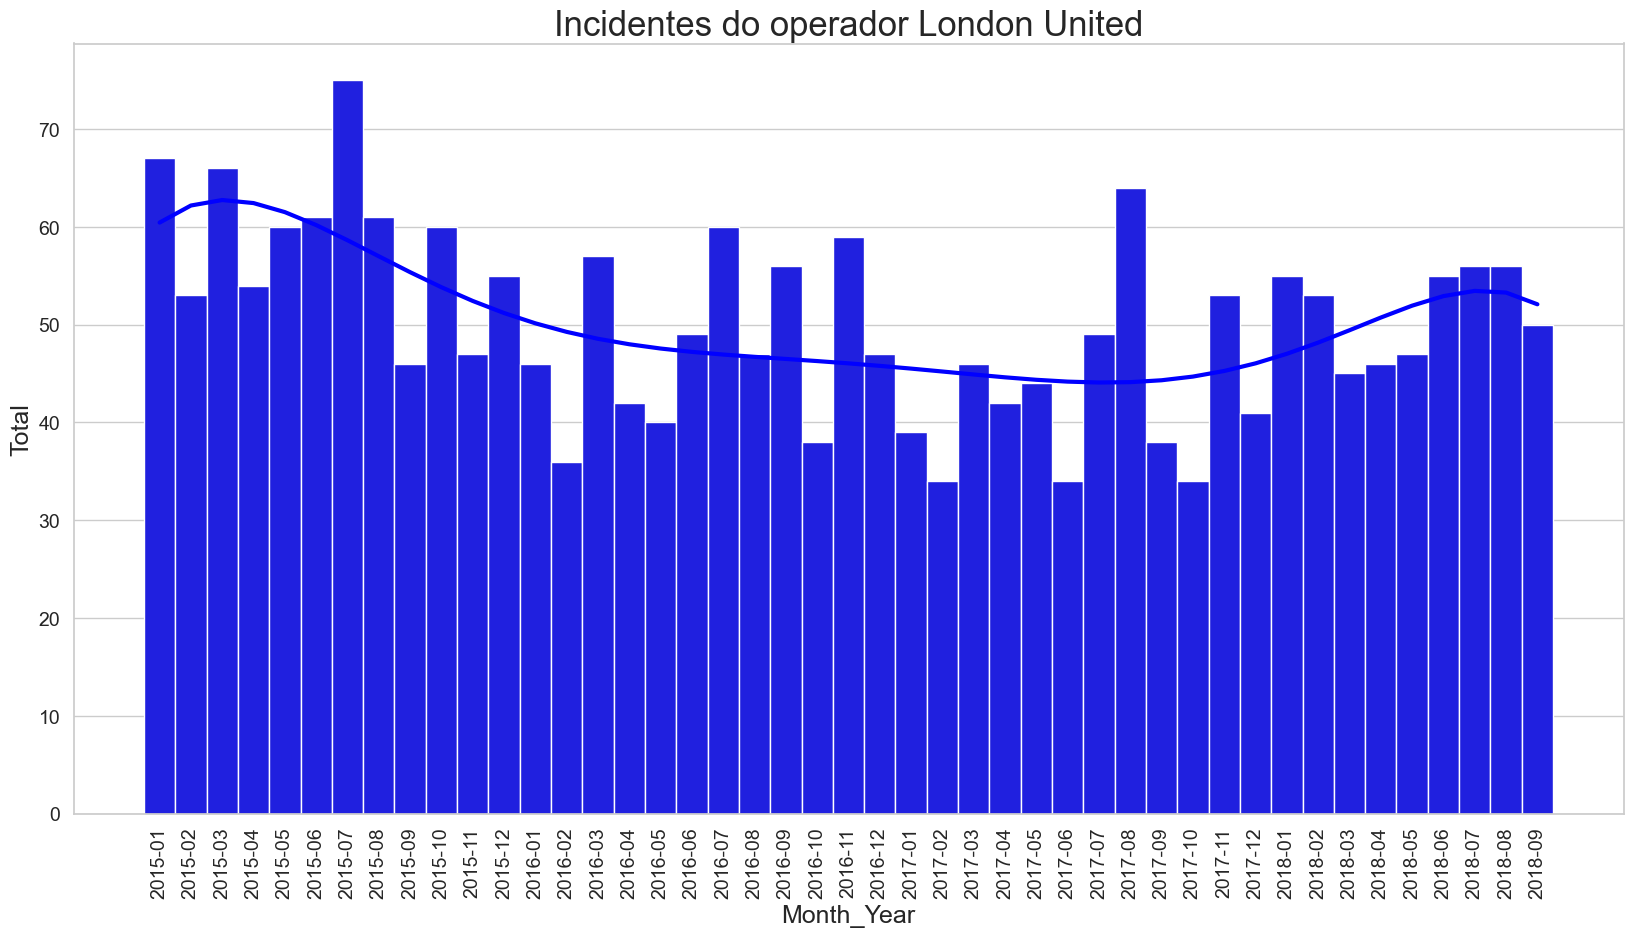

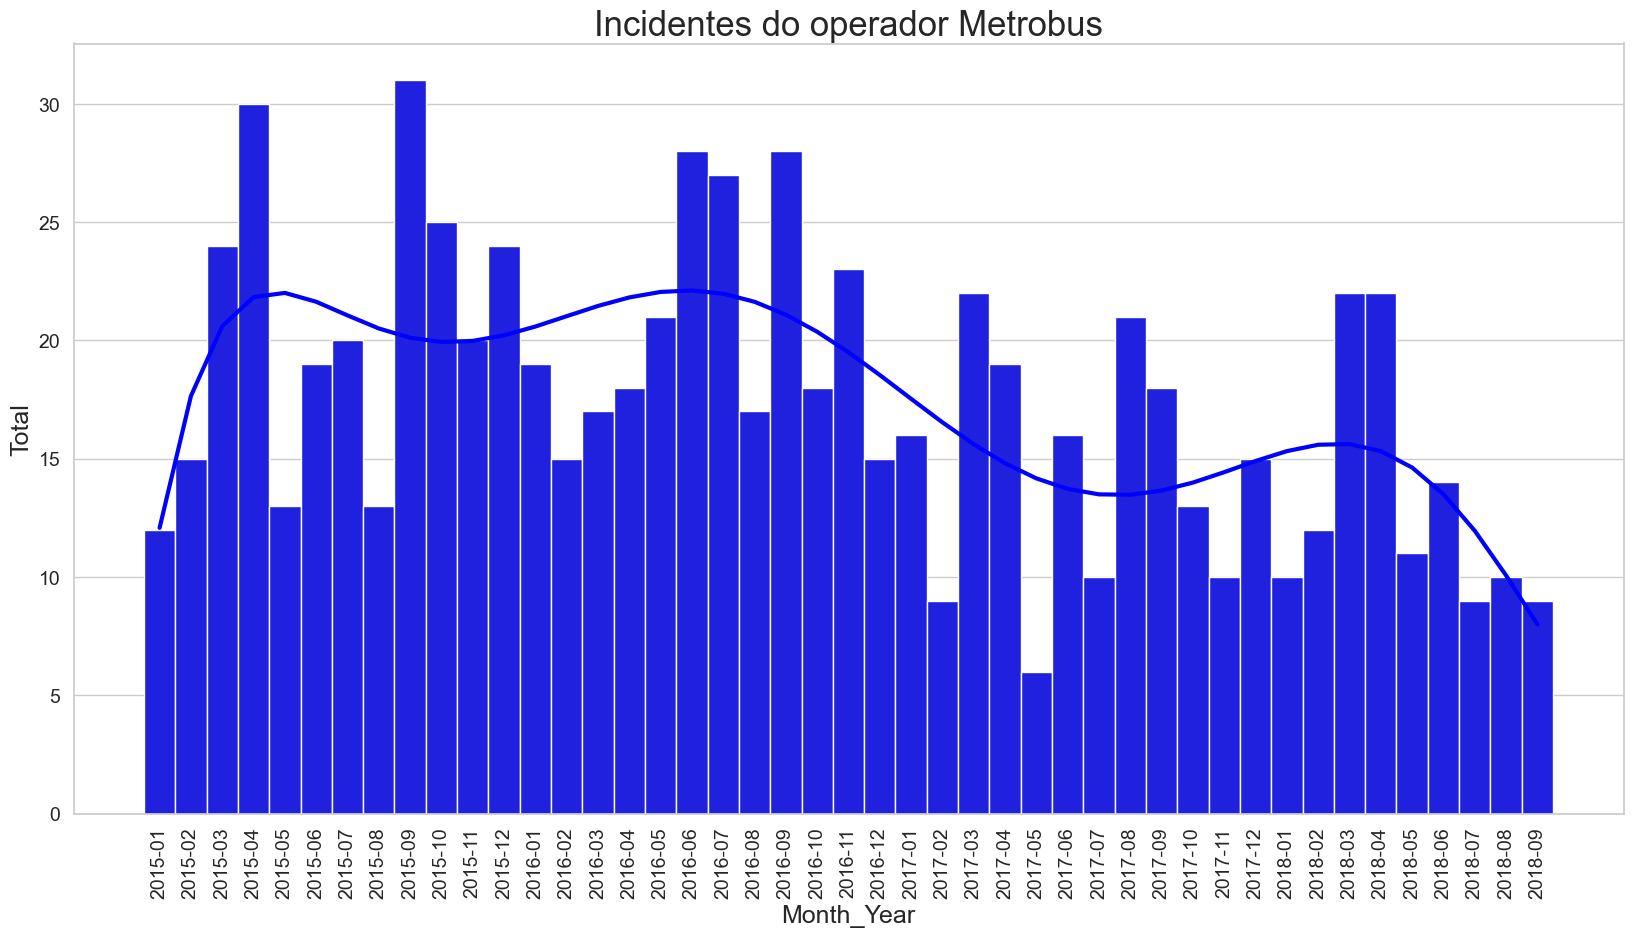

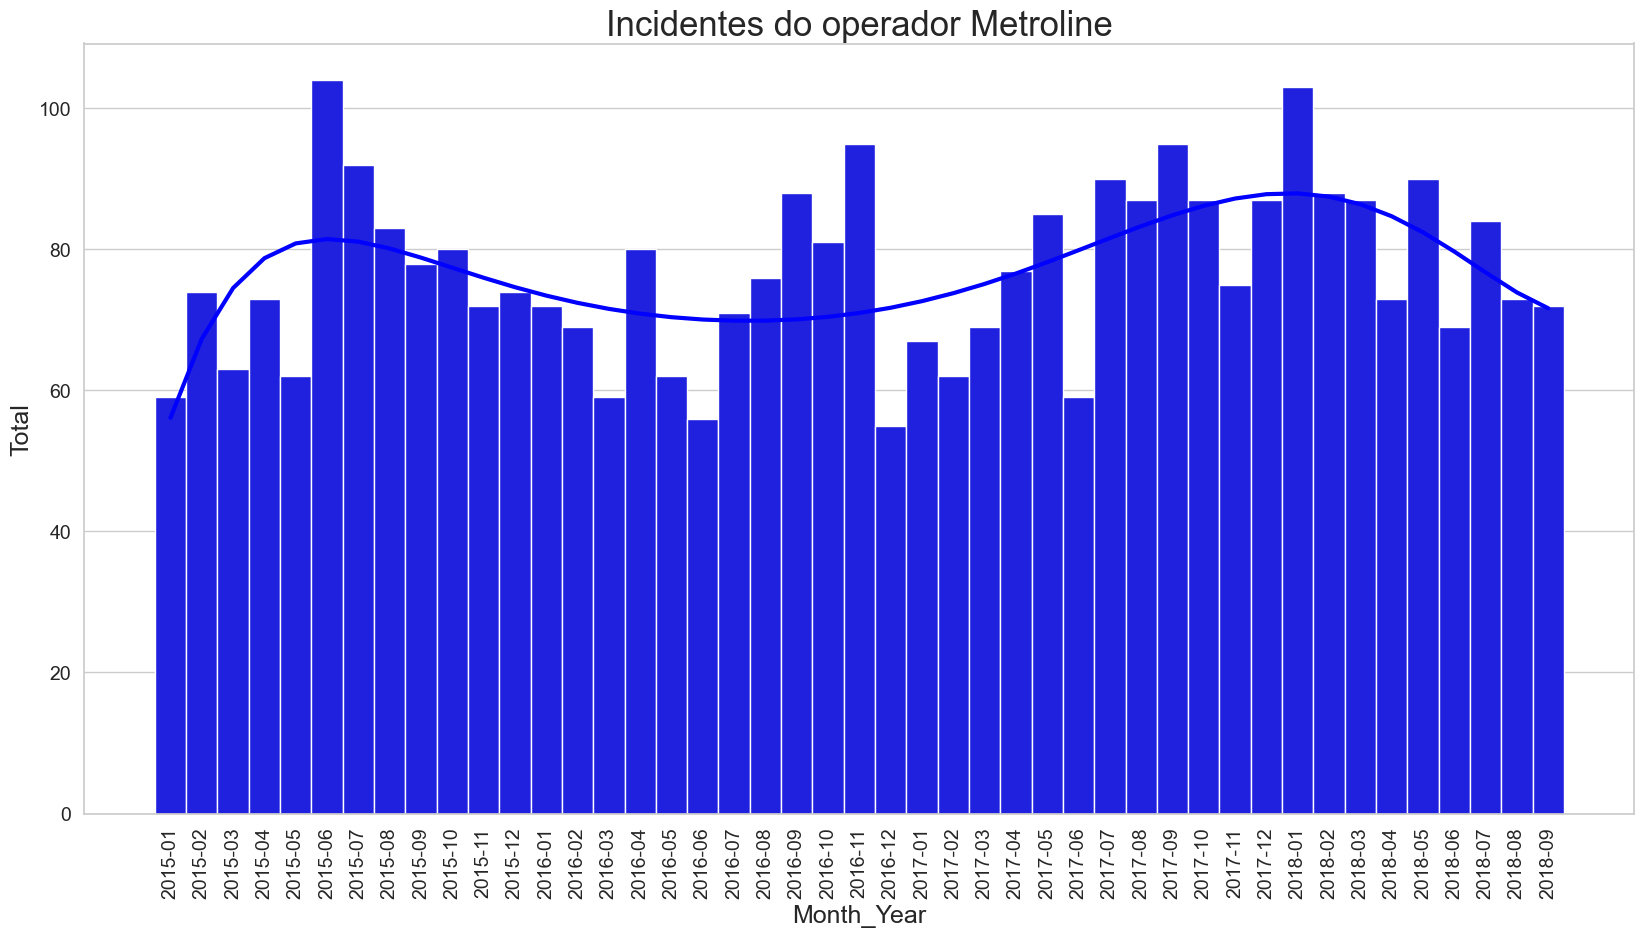

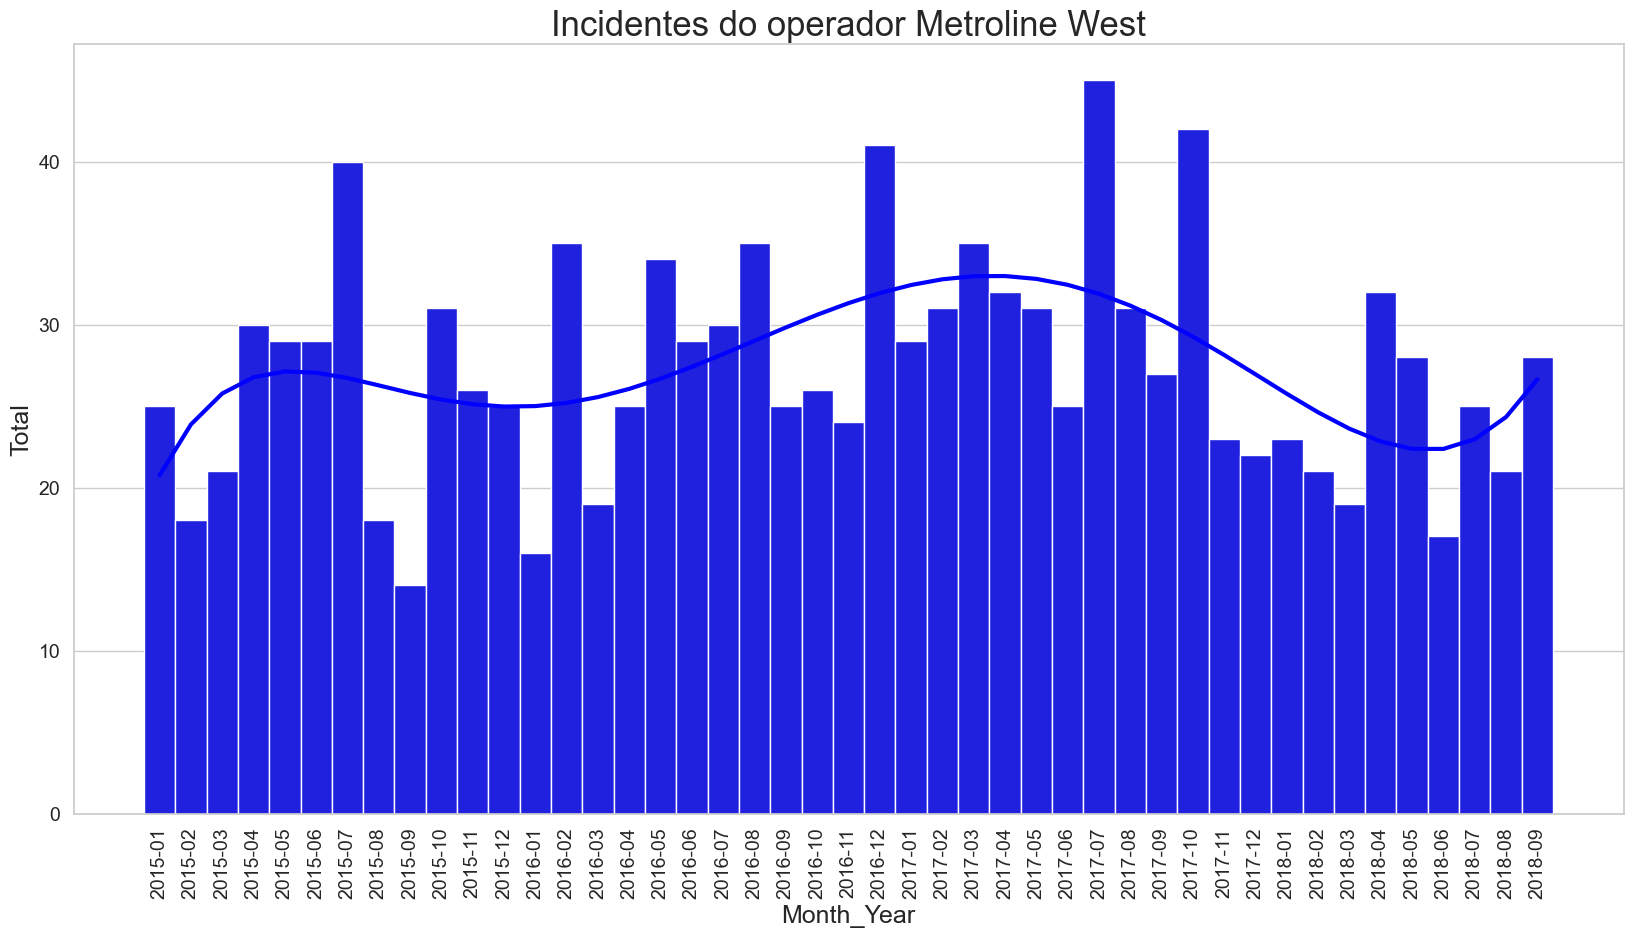

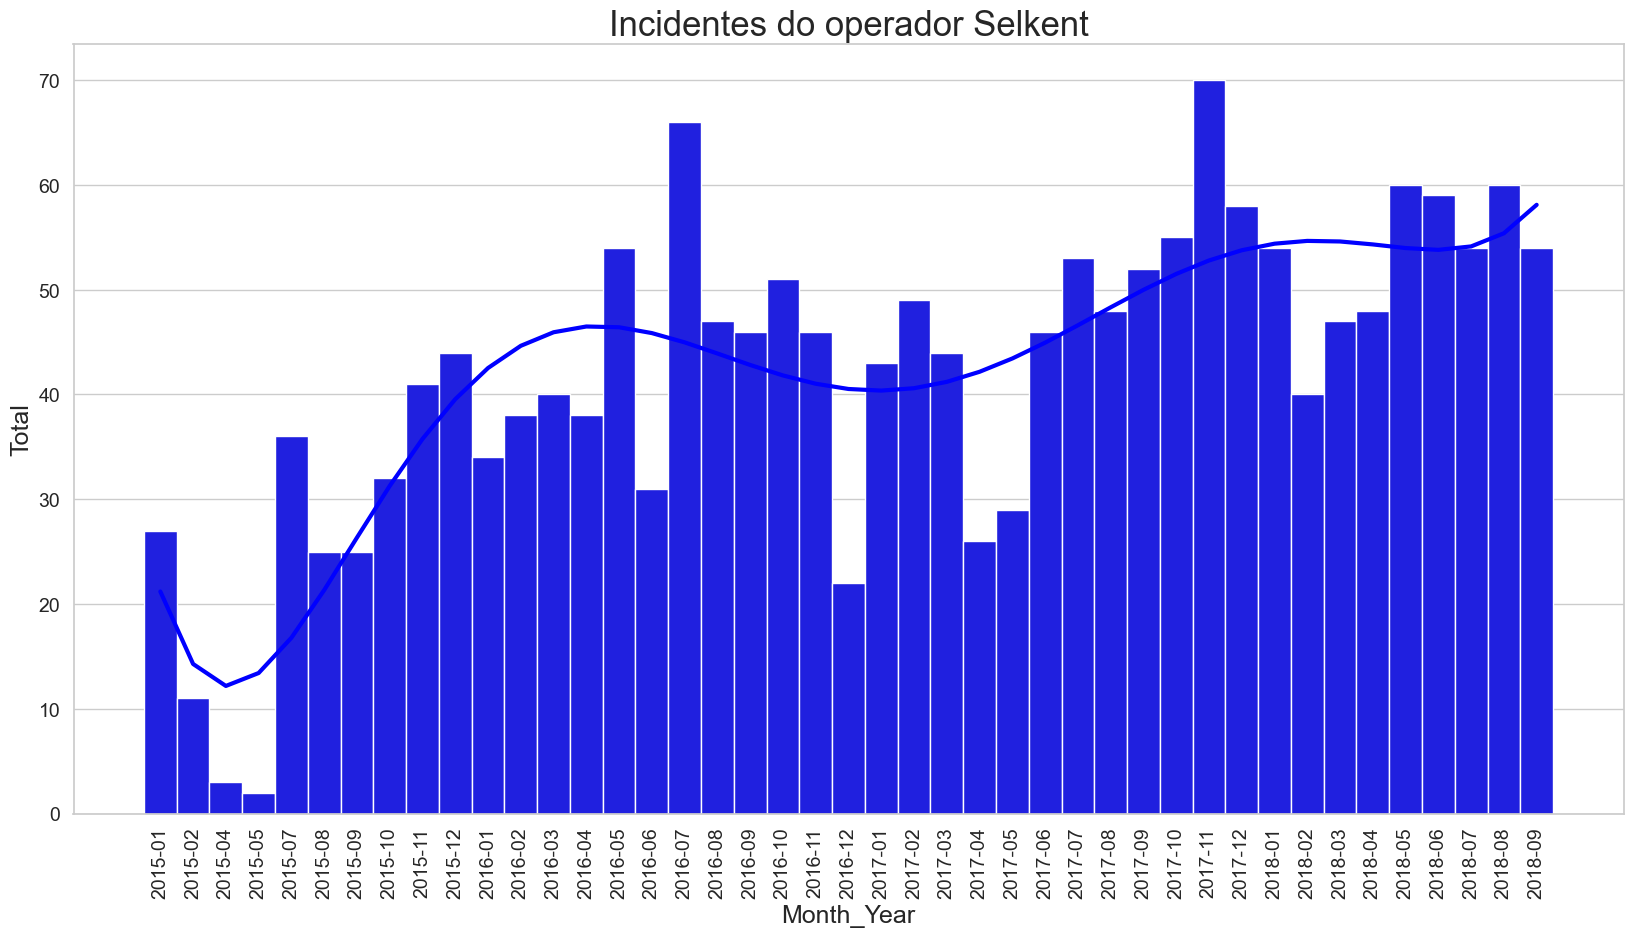

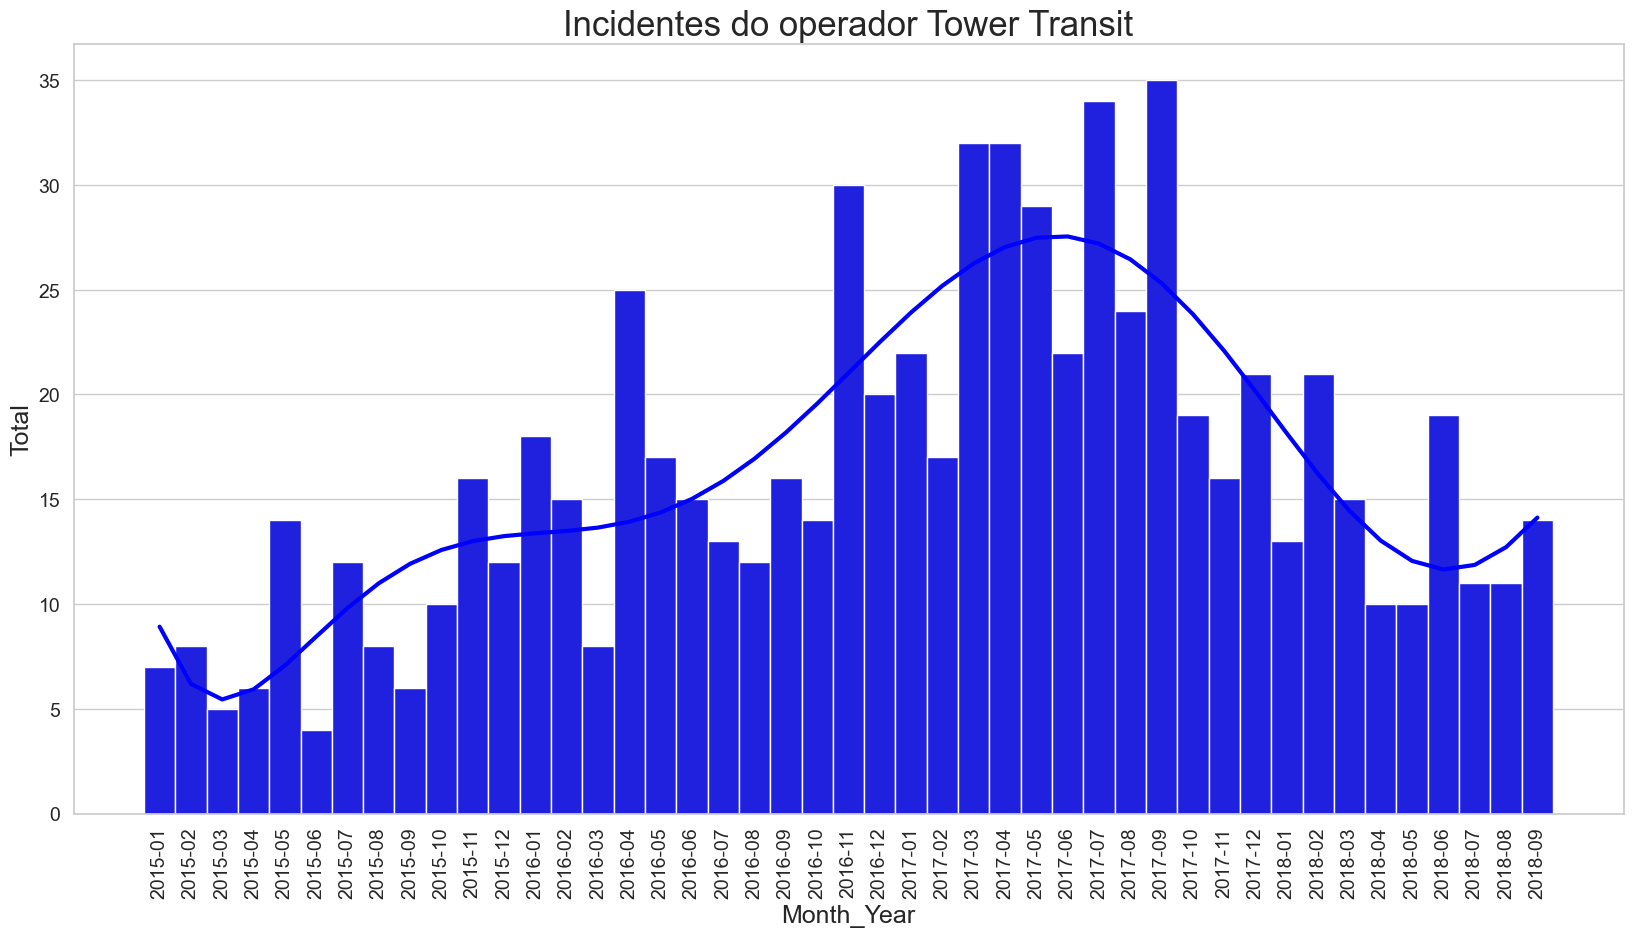

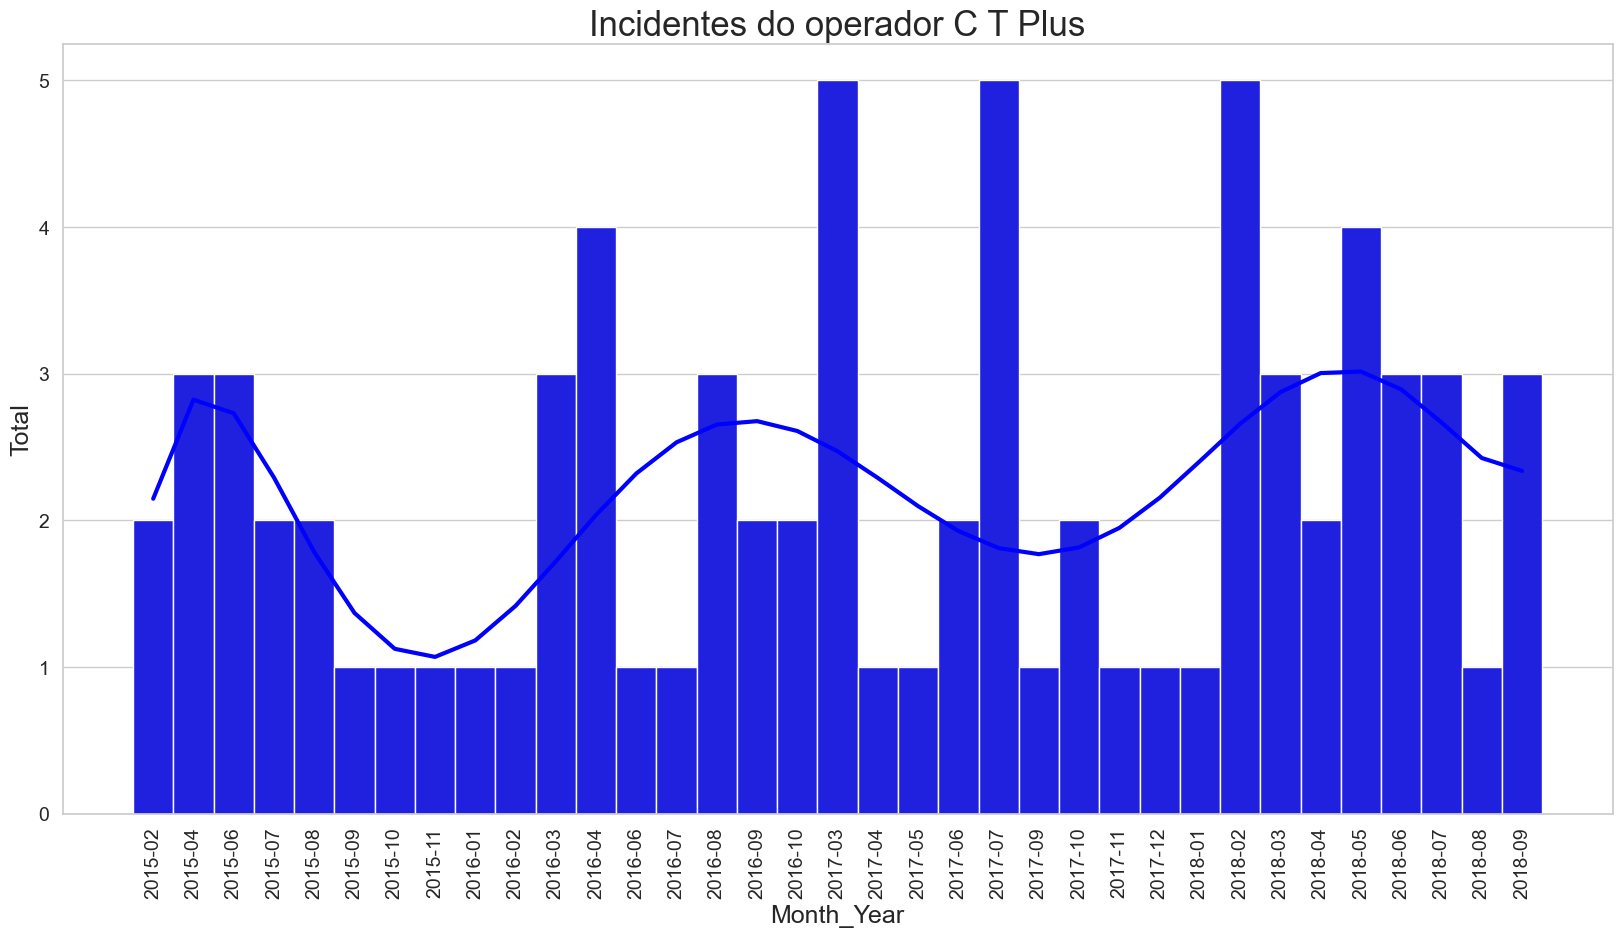

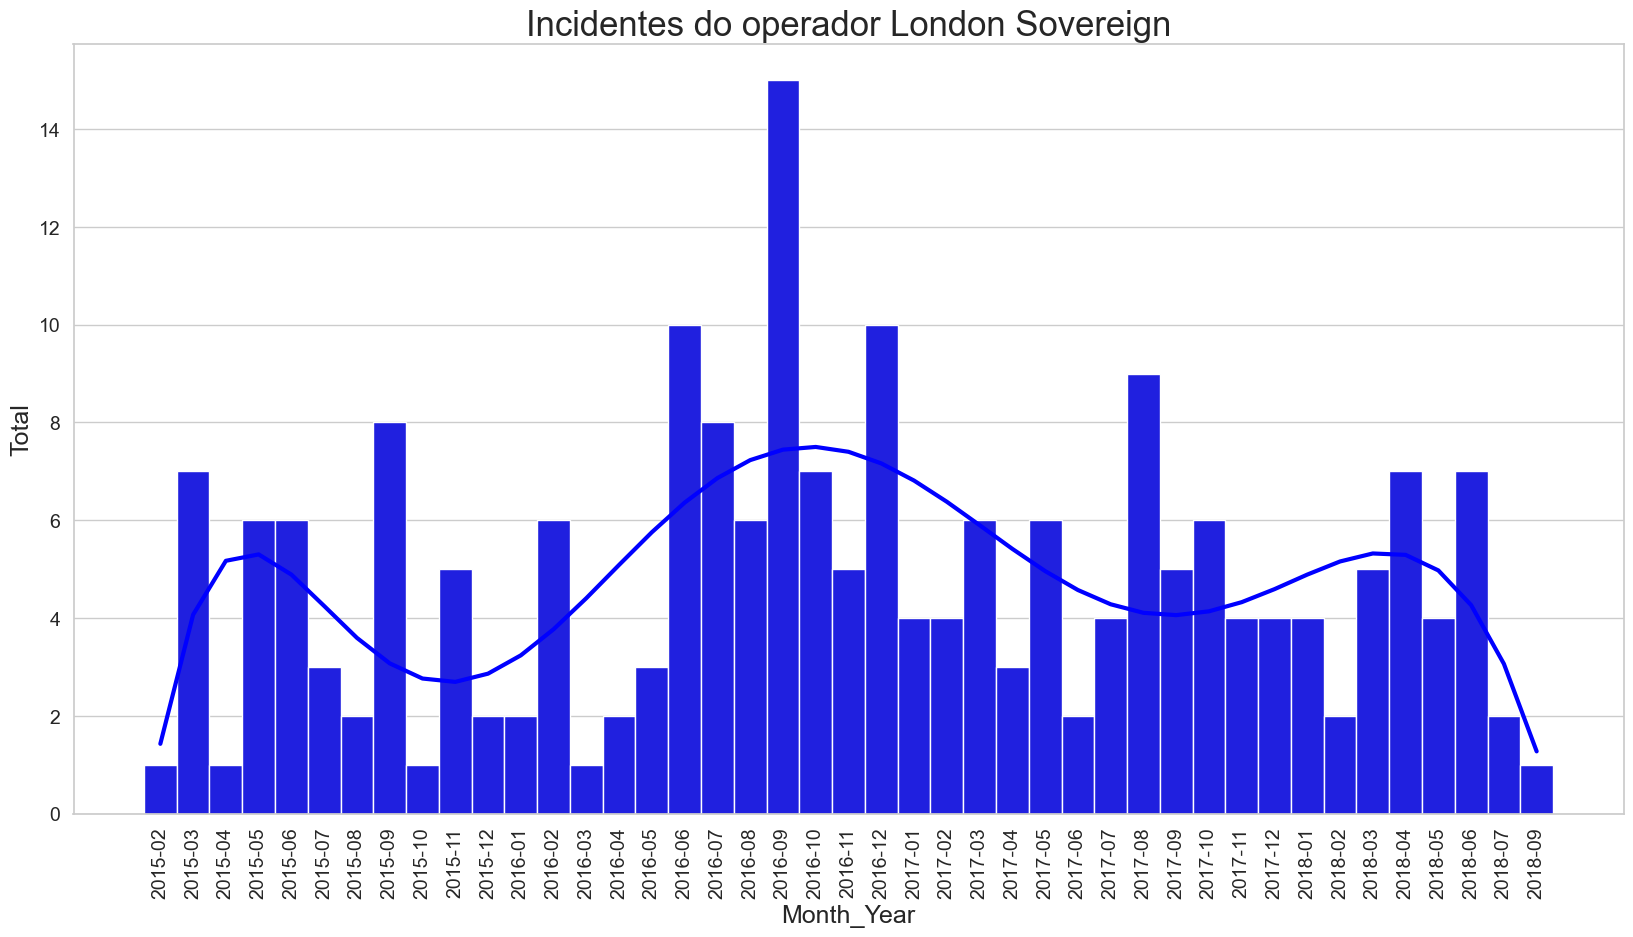

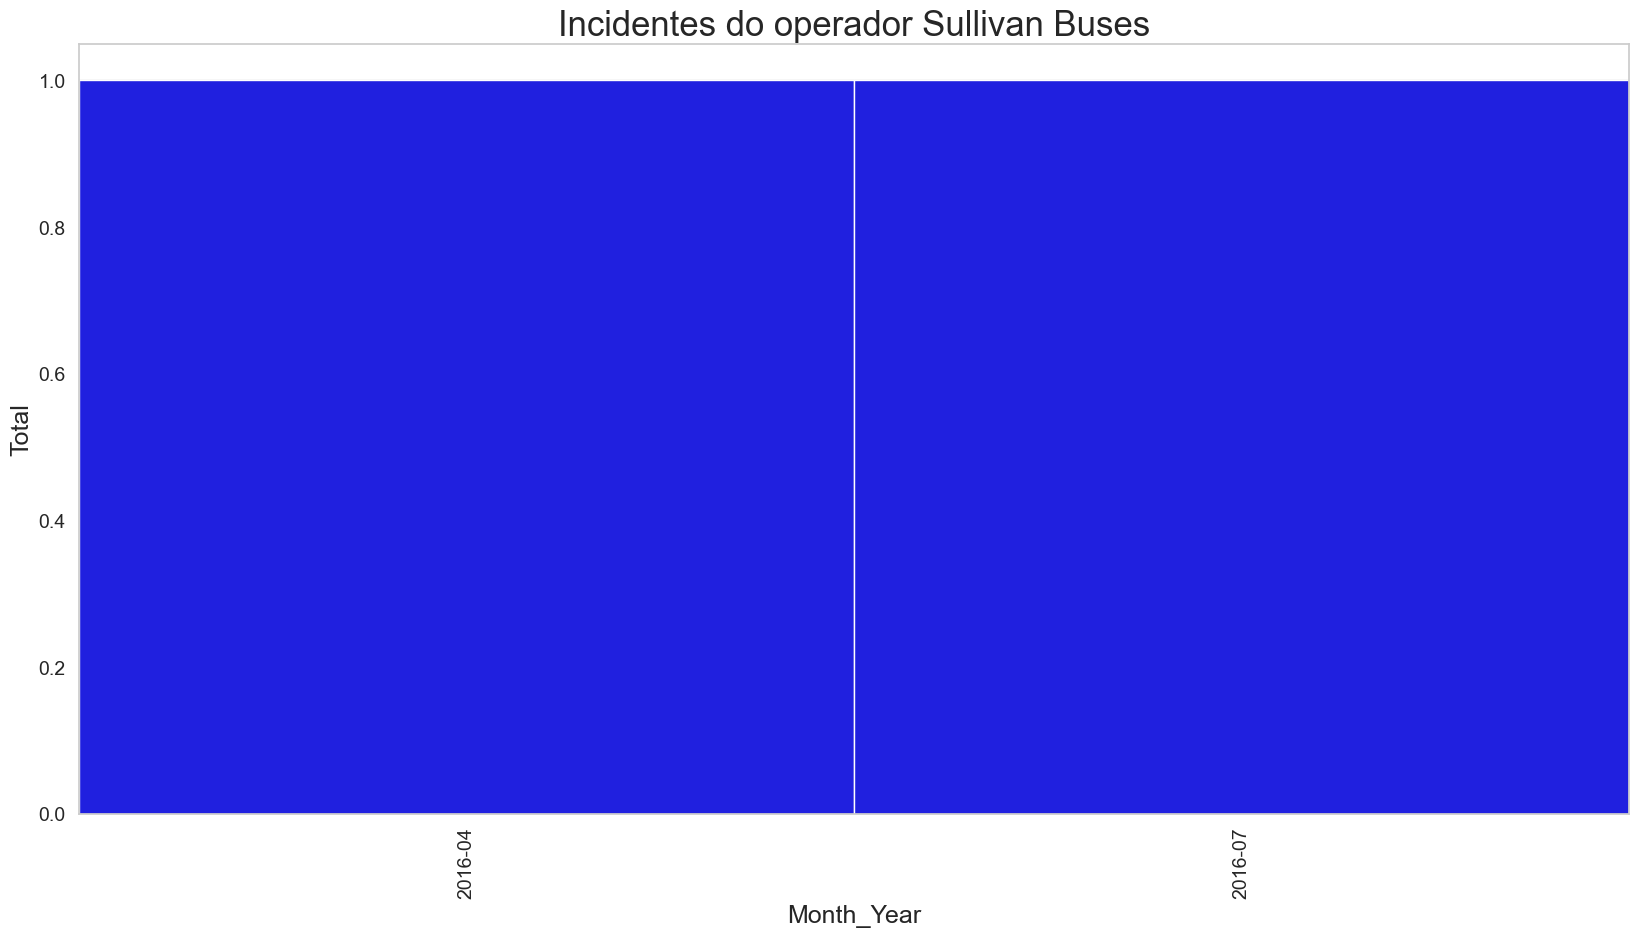

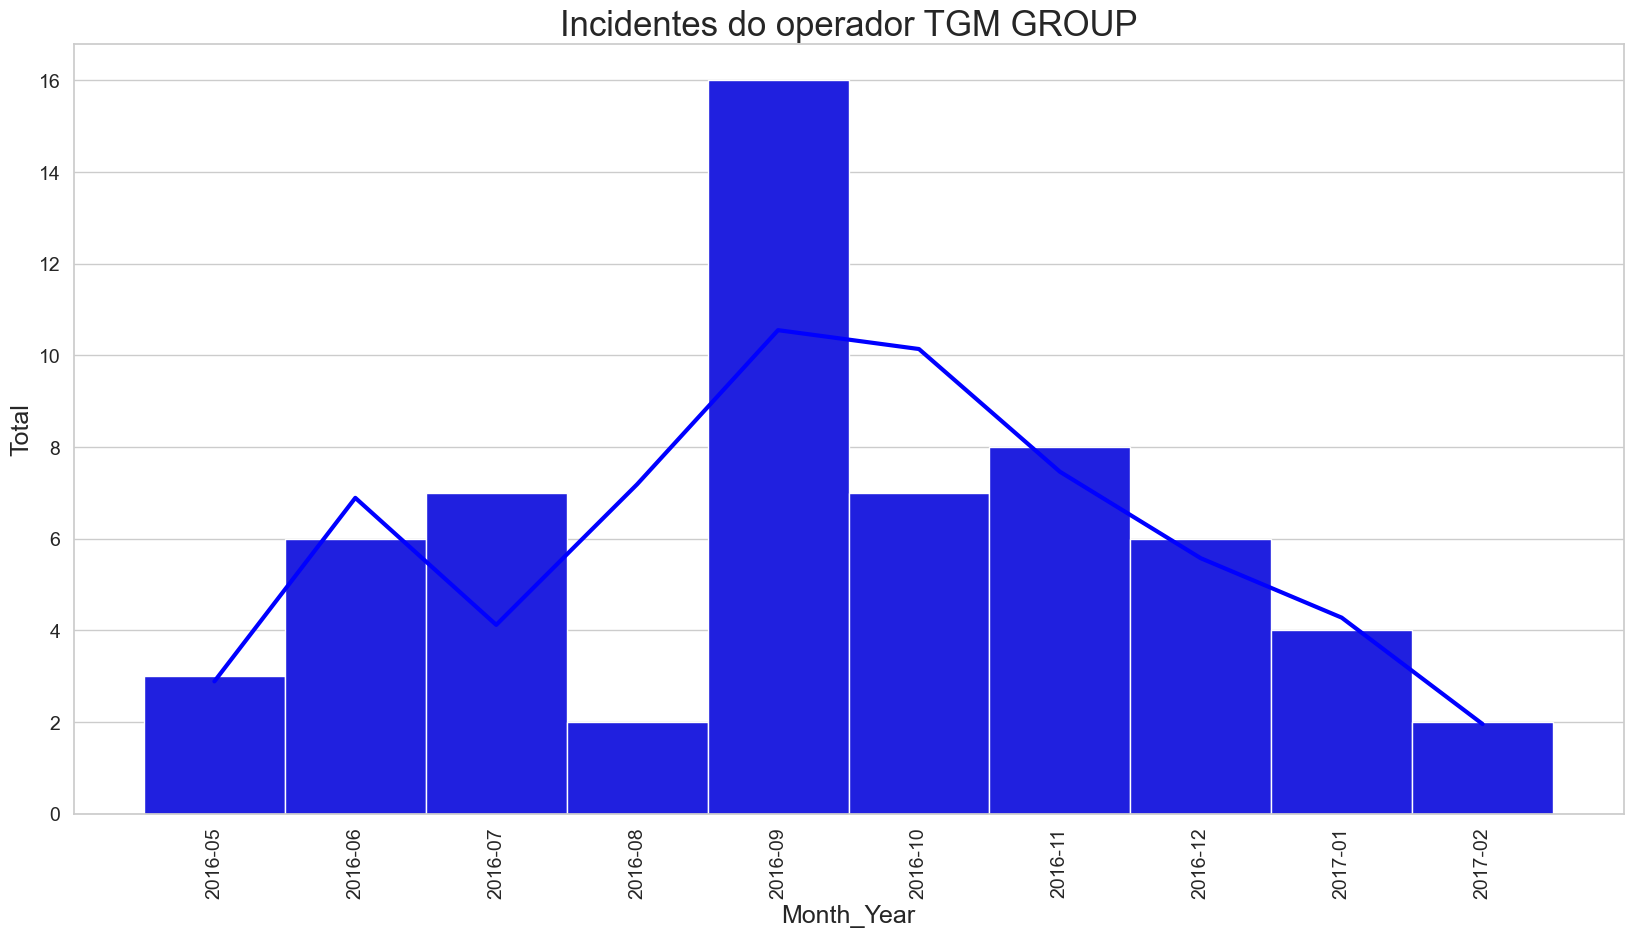

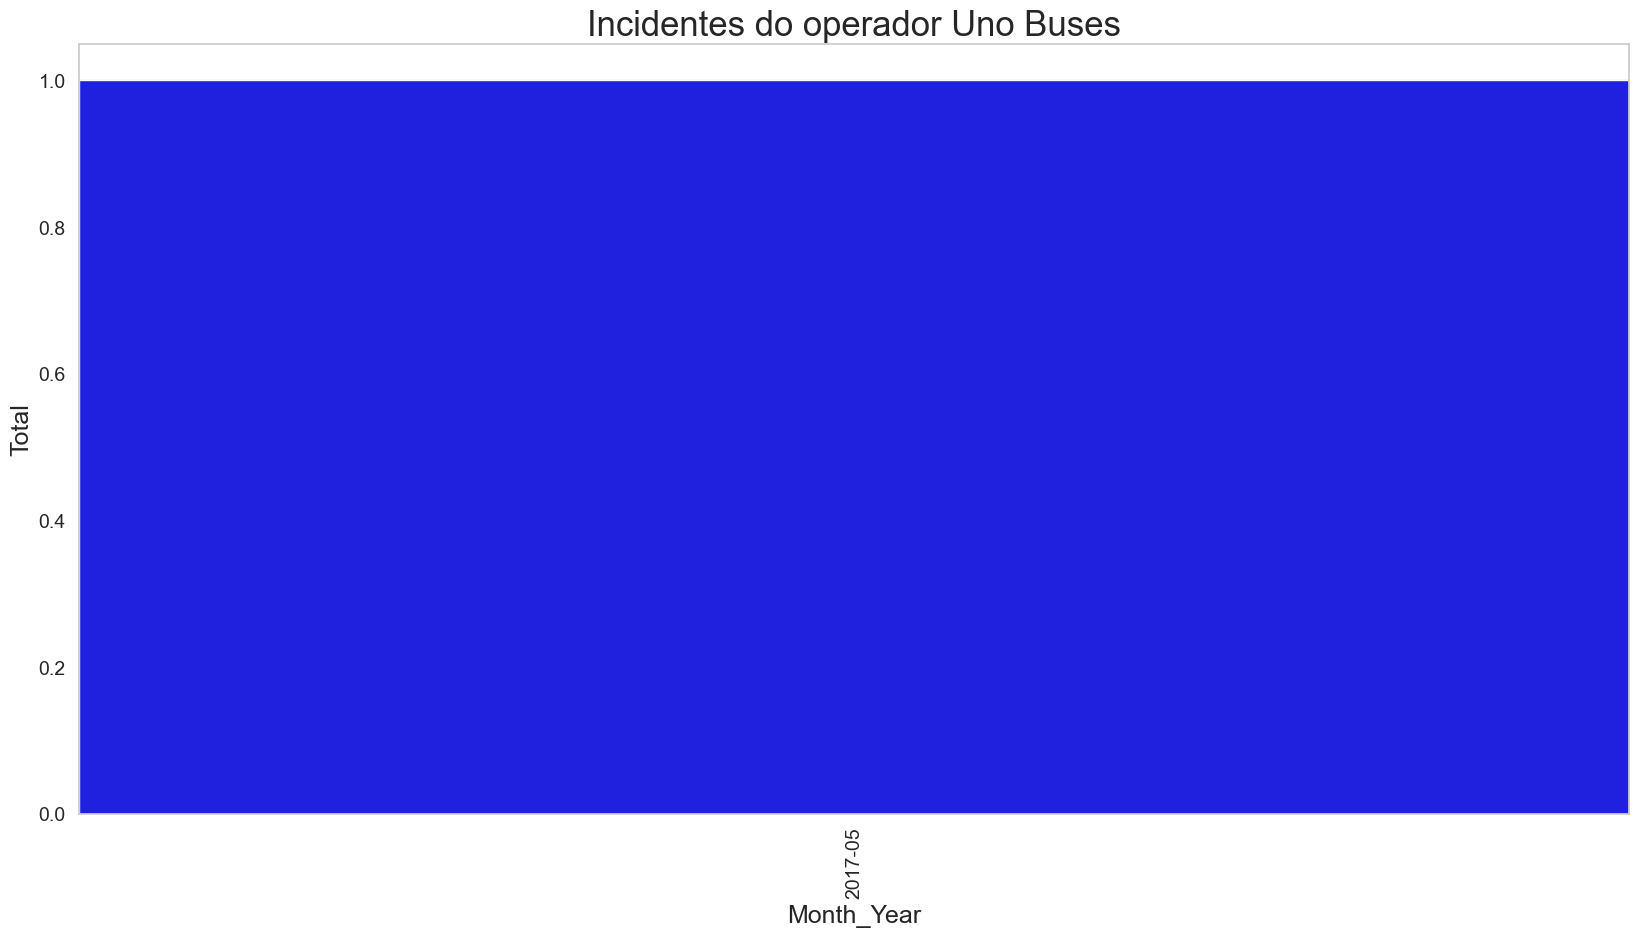

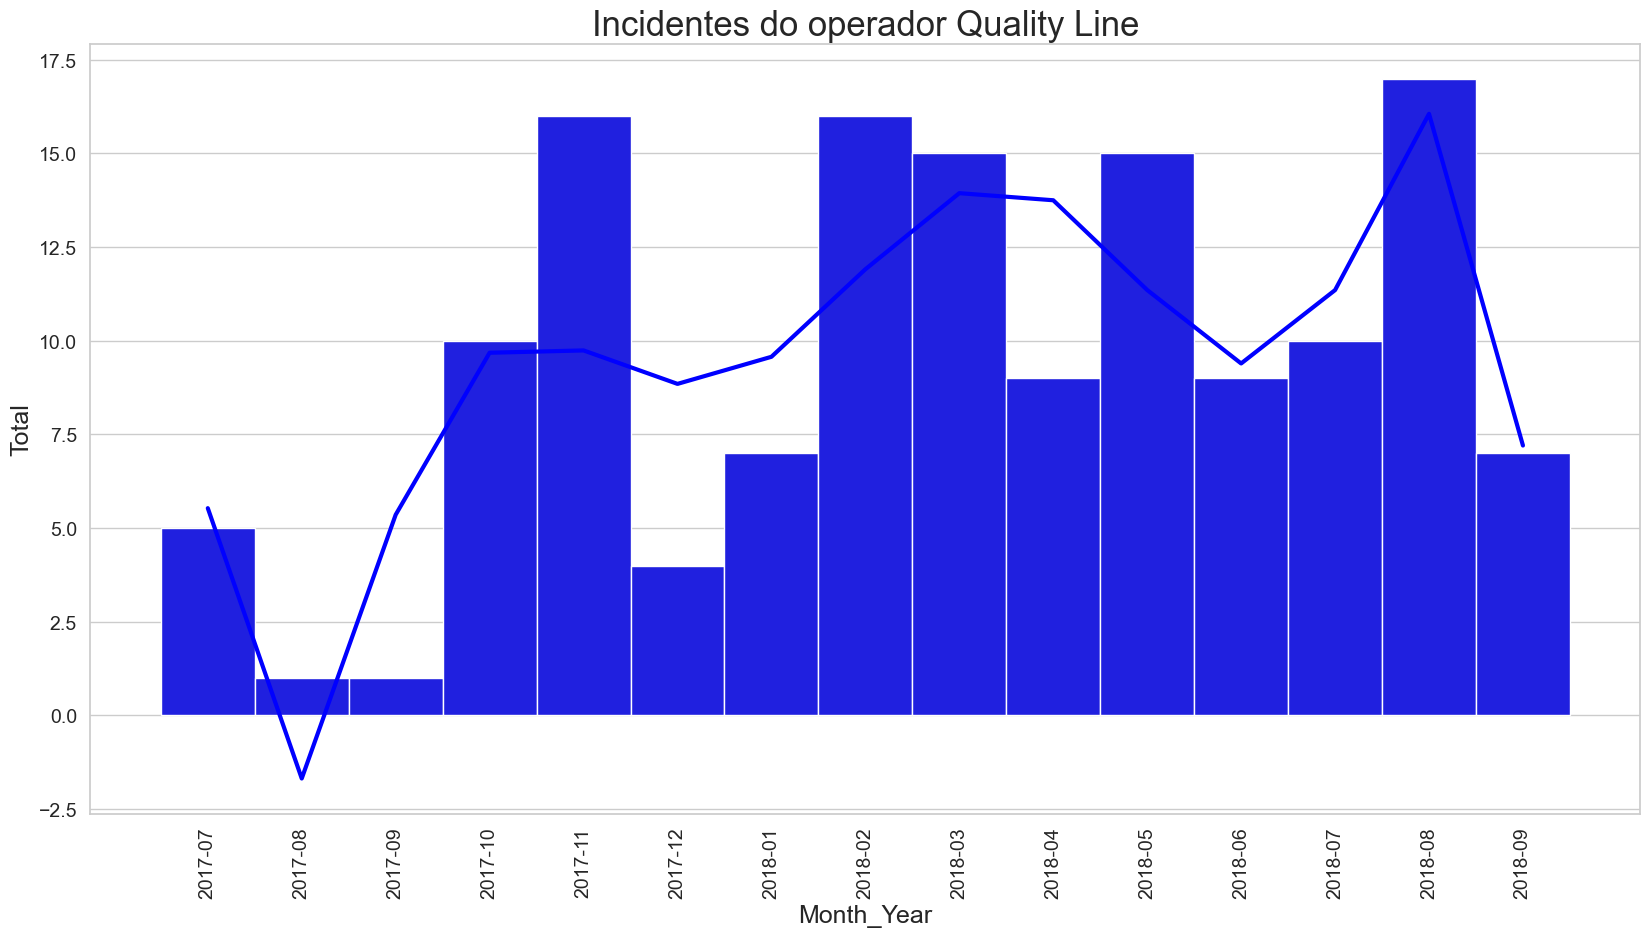

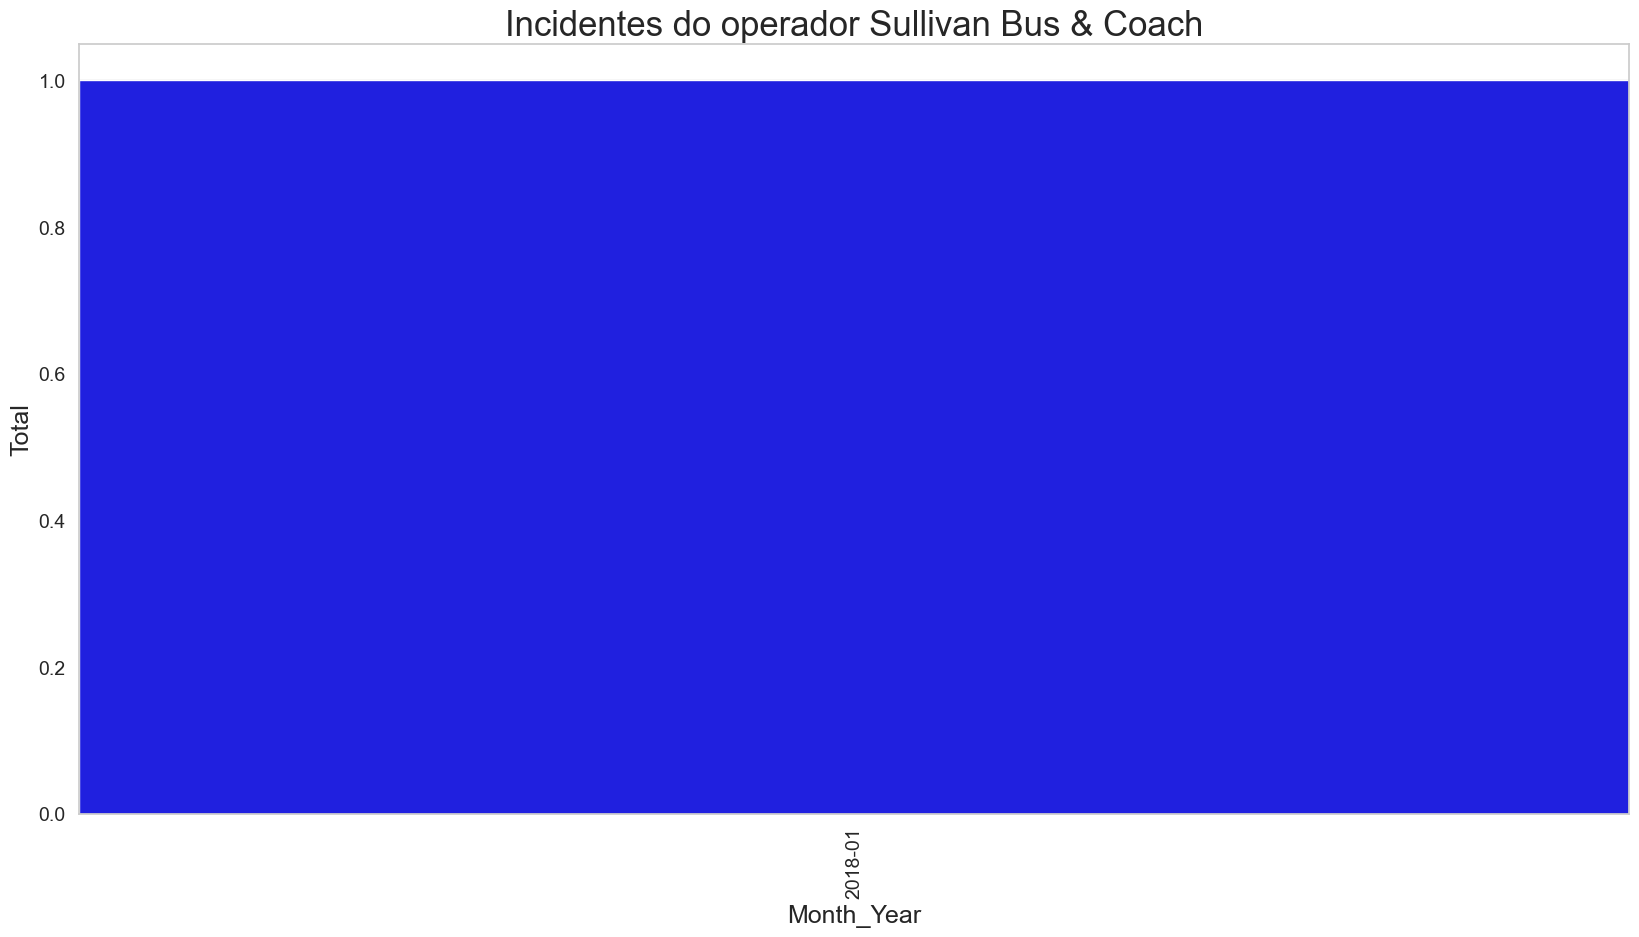

In [63]:
for operador in df_incidents_operator.Operator.unique():
    # Tamanho da figura
    plt.figure(figsize=(20, 10))
    df_temp = df_incidents_operator[df_incidents_operator.Operator==operador]
    # Chart
    chart = sns.barplot(x='Month_Year',
                        y='Total',
                        data=df_temp,
                        width=1,
                        color='blue'
                        )
    if(df_temp.shape[0]!= df_temp.Total.sum()):
        x = np.arange(0, df_temp.shape[0], 1)
        y = np.array(df_temp.Total.values)
        z = np.polyfit(x, y, 7)
        p = np.poly1d(z)
        sns.lineplot(x=x,
                     y=p(x),
                     color='blue',
                     linewidth=3)
    chart.tick_params(axis='x', labelrotation=90)
    chart.set_title("Incidentes do operador " + operador, fontsize=25)
    # Estilo e labels
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')
    sns.set_palette('prism')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14);

### Pergunta 10 - Qual o tipo de incidente mais comum com ciclistas?

In [52]:
df[df['Victim_Category'] == 'Cyclist'].groupby('Incident_Event_Type').agg(
    Total=('Victim_Category', 'count')).sort_values(by='Total').reset_index().tail(1)


,Incident_Event_Type,Total
3,Collision Incident,256


In [53]:
sqldf(
    "SELECT Incident_Event_Type, COUNT(*) as Total from df WHERE Victim_Category == 'Cyclist' GROUP BY Incident_Event_Type ORDER BY Total DESC LIMIT 1")

,Incident_Event_Type,Total
0,Collision Incident,256
